<a href="https://colab.research.google.com/github/gitnicolas343/Quamtum_machine_learning/blob/main/3_MULTIPLE_CBITS_AND_QUBITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
!pip install -U qiskit-aer pylatexenc matplotlib qiskit[visualization] > /dev/null

In [320]:
import numpy as np

# Introducción: Sistemas cuánticos de múltiples qubits

---

En capítulos cuadernos anteriores aprendimos a describir un solo qubit: cómo representarlo, manipularlo con compuertas cuánticas y medirlo. Sin embargo, la verdadera potencia de la computación cuántica emerge cuando trabajamos con más de un qubit, en este cuaderno nos enfocamos en **sistemas cuánticos compuestos por múltiples qubits**. En particular veremos:

- como representar estados de múltiples qubits usando el formalismo matemático apropiado (productos tensoriales).
- Aplicar transformaciones a estos sistemas usando compuertas cuánticas que pueden actuar sobre uno o más qubits.
- Realizar mediciones y entender cómo los resultados se ven afectados por las interacciones entre qubits.


## Representación de Bits Clásicos como Enteros y Vectores One-Hot

---


Dado un sistema de $n = 3$ bits clásicos (cbits), una configuración puede representarse de tres formas equivalentes en sintesis:

### 1. Cadena de bits

esta  configuración se denota como:

$$
x_0, x_1, x_2 \in \{0, 1\}
$$

simplemente es la sucesion de 1 y 0 como si se trataran de letras crudas del alfabeto 'ABC' pero que toman significado para nuestros fines.

Por ejemplo: $101$

---

### 2. Como entero

Podemos usar una operacion matematica que convierte la cadena en un número usando:

$$
x = 2^2 x_0 + 2^1 x_1 + 2^0 x_2
$$

Que simplemente es la generalizacion de las transformaciones de digitos binarios a decimales analogamente, por ejemplo, para $x_0 = 1, x_1 = 0, x_2 = 1$:

$$
x = 2^2 \cdot 1 + 2^1 \cdot 0 + 2^0 \cdot 1 = 5
$$

---

### 3. Vector one-hot

Creamos un vector columna de dimensión $2^n$ donde solo la posición $x$ (desde cero) es $1$ y el resto son $0$, valiendose de la notacion de Dirac vista anteriormente:

$$
|x\rangle_n = [0, \dots, 0, 1, 0, \dots, 0]^T
$$

Ejemplo para $x = 5$ y $n = 3$:

$$
|5\rangle_3 = |101\rangle = [0, 0, 0, 0, 0, 1, 0, 0]^T
$$

---

## Tabla de Ejemplo para $n = 3$

Entero x | Cbits      | One-Hot Vector
---------|------------|------------------------------------------------------------------------------------------------------------------------------------------
   0     | 000      | $|000\rangle $ = [1, 0, 0, 0, 0, 0, 0, 0]^T
   1     | 001      | $|001\rangle $ = [0, 1, 0, 0, 0, 0, 0, 0]^T
   2     | 010      | $|010\rangle $ = [0, 0, 1, 0, 0, 0, 0, 0]^T
   3     | 011      | $|011\rangle $ = [0, 0, 0, 1, 0, 0, 0, 0]^T
   4     | 100      | $|100\rangle $ = [0, 0, 0, 0, 1, 0, 0, 0]^T
   5     | 101      | $|101\rangle $ = [0, 0, 0, 0, 0, 1, 0, 0]^T
   6     | 110      | $|110\rangle $ = [0, 0, 0, 0, 0, 0, 1, 0]^T
   7     | 111      | $|111\rangle $ = [0, 0, 0, 0, 0, 0, 0, 1]^T


Cabe destacar que la representación clásica de la información por n Cbit requiere sistemas físicos realizables, switches, por ejemplo, por lo que la notación one-hot es tremendamente ineficiente, por ejemplo, n = 10, tendríamos un vector de tamaño n = 1024 y un vector de amplitud  $10^100$ lo cual es más grande que el número de átomos en el universo.





$$
\textbf{Random Cbits y vectores de probabilidad}
$$

---

Aunque los vectores one-hot son ineficientes en términos de memoria, se utilizan comúnmente en aprendizaje automático para variables discretas. La distribución de probabilidad de una cadena aleatoria de $n$ cbits se representa mediante un vector de                   probabilidad  de dimensión $2^n \times 1$:                                                           

$$
\mathbf{p} = \begin{bmatrix} p_0 \\ p_1 \\ \vdots \\ p_{2^n - 1} \end{bmatrix},
\quad \text{con } p_x \geq 0 \quad \text{y} \quad \sum_{x=0}^{2^n - 1} p_x = 1.
$$

Aquí, $p_x$ es la probabilidad de que la cadena de cbits sea igual a $x \in \{0, 1, ..., 2^n - 1\}$.

---

$$
\textbf{Representación de un solo cbit}
$$

Un solo cbit determinista se representa mediante un vector one-hot de dimensión $2 \times 1$:

$$
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad
|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}.
$$

---

$$
\textbf{Producto de Kronecker para múltiples cbits}
$$

Para un sistema de $n$ cbits con valores $x_0, x_1, ..., x_{n-1} \in \{0, 1\}$, el vector one-hot $|x\rangle_n$ de dimensión $2^n \times 1$ se obtiene mediante el producto de Kronecker de los vectores individuales:

$$
|x_0 x_1 \ldots x_{n-1}\rangle = |x_0\rangle \otimes |x_1\rangle \otimes \cdots \otimes |x_{n-1}\rangle.
$$

Dado

$$
\mathbf{a} = \begin{bmatrix} a_1 \\ a_2 \\ \vdots \\ a_m \end{bmatrix}, \quad
\mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_k \end{bmatrix},
$$

el producto de Kronecker $\mathbf{a} \otimes \mathbf{b}$ es:

$$
\mathbf{a} \otimes \mathbf{b} =
\begin{bmatrix}
a_1 \mathbf{b} \\
a_2 \mathbf{b} \\
\vdots \\
a_m \mathbf{b}
\end{bmatrix}
=
\begin{bmatrix}
a_1 b_1 \\
a_1 b_2 \\
\vdots \\
a_m b_k
\end{bmatrix},
$$

con un vector resultante de dimensión $mk \times 1$.

---

##Ejemplo:
Para un sistema de  n=3 $\text{ cbits con } x_0=1, x_1=1, x_2=0
$

Los vectores individuales son

$$
|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad
|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}.
$$

El vector conjunto se calcula como

$$
|110\rangle = |1\rangle \otimes |1\rangle \otimes |0\rangle =
\left(\begin{bmatrix} 0 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix}\right) \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix}.
$$

Evaluando paso a paso:

$$
\begin{bmatrix} 0 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix} =
\begin{bmatrix}
0 \cdot \begin{bmatrix}0 \\ 1\end{bmatrix} \\
1 \cdot \begin{bmatrix}0 \\ 1\end{bmatrix}
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 1
\end{bmatrix},
$$

y luego,

$$
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix} =
\begin{bmatrix}
0 \cdot \begin{bmatrix}1 \\ 0\end{bmatrix} \\
0 \cdot \begin{bmatrix}1 \\ 0\end{bmatrix} \\
0 \cdot \begin{bmatrix}1 \\ 0\end{bmatrix} \\
1 \cdot \begin{bmatrix}1 \\ 0\end{bmatrix}
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0
\end{bmatrix}.
$$

Este es el vector one-hot de $2^3=8$ dimensiones con un $1$ en la posición 6 (empezando a contar desde cero), que corresponde al número entero $6$ o al bitstring "110".


In [321]:
#este pequeño programa construye los vectores one hot para entradas bitstring "x_1,x_2,x_3"

def one_hot_cbit(x):
    if x == 0:
        return np.array([1,0])
    else:
        return np.array([0,1])

def one_hot_cbits(bitstring):
    state = one_hot_cbit(bitstring[0])
    for bit in bitstring[1:]:
        state = np.kron(state, one_hot_cbit(bit))
    return state


# Ejemplo:
bitstring = [0, 0, 0]
result = one_hot_cbits(bitstring)

print("Vector one-hot para", bitstring, ":")
print(result,"^T",)
print("Índice con 1 =", np.argmax(result))


Vector one-hot para [0, 0, 0] :
[1 0 0 0 0 0 0 0] ^T
Índice con 1 = 0


#Probabilidad en Sistemas de Cbits



Imaginemos que tenemos $n$ Cbits clásicos aleatorio, y de cada uno se conoce distribución de probabilidad individual. Ahora una pregunta que nos podemos hacer es la siguiente:


> Si conocemos esas distribuciones individuales (marginales), ¿puedo saber cómo se comporta todo el sistema completo (la distribución conjunta)?

###Analizando...

###si son estadisticamente independientes:
Si los cúbits no están correlacionados entre sí, entonces sí se puede. Por ejemplo, si se tiene:

$$
p_A = \begin{bmatrix} p_0^A \\ p_1^A \end{bmatrix}, \quad
p_B = \begin{bmatrix} p_0^B \\ p_1^B \end{bmatrix}
$$

Entonces el sistema completo tiene 4 posibles combinaciones: $(00, 01, 10, 11)$, y sus probabilidades se calculan multiplicando las individuales:

$$
p = p_A \otimes p_B =
\begin{bmatrix}
p_0^A p_0^B \\
p_0^A p_1^B \\
p_1^A p_0^B \\
p_1^A p_1^B
\end{bmatrix}
$$

Este es el caso en el que la probabilidad conjunta es independiente y la probabilidad de las variables aleatorias es el producto de las marginales.


###Estadisticamente dependientes:

Pero si hay alguna correlacion entre $A$ y $B$ (por ejemplo, que cuando $A$ está en 0,  $B$ tiende a estar en 1), ya no se puede hacer eso. En ese caso, necesitamos la distribución conjunta total:.


$$
p = \begin{bmatrix} p_{00} \\ p_{01} \\p_{10} \\p_{11}\end{bmatrix}
$$

donde cada $p_{xy}$ lo cual nos dice directamente la probabilidad de que $A$ esté en $x$ y $B$ en $y$, por lo que esta distribución no se puede reconstruir sólo con los vectores marginales $p_A$ y $p_B$ , a menos que se sepan que los Cbits son independientes.

En sintesis si sólo se sabe lo que pasa con las partes (marginales),
No siempre se puede saber lo que pasa con el todo (distribución conjunta),A menos que se sepa que no hay correlación (independencia).

#EJEMPLO


Supongamos que tenemos dos Cbits aleatorios $A$ y $B$.

imaginemos el caso en que los Cbits son Independientes

Los vectores de probabilidad marginal para $A$ y $B$ son:

$$
p_A = \begin{bmatrix} 0.3 \\ 0.7 \end{bmatrix}, \quad
p_B = \begin{bmatrix} 0.6 \\ 0.4 \end{bmatrix}
$$

Lo cual nos dice que:


* $P(A = 0) = 0.3$, $P(A = 1) = 0.7$
* $P(B = 0) = 0.6$, $P(B = 1) = 0.4$

Como los cbits son independientes, podemos calcular la distribución conjunta mediante el producto tensorial:

$$
p_A \otimes p_B = \begin{bmatrix} 0.3 \cdot 0.6 \\0.3 \cdot 0.4 \\0.7 \cdot 0.6 \\0.7 \cdot 0.4 \end{bmatrix} = \begin{bmatrix}0.18 \\ 0.12 \\ 0.42 \\ 0.28 \end{bmatrix}
$$

Por lo que cada componente representa:


* $P_{00}$ = 0.18
* $P_{01}$ = 0.12
* $P_{10}$ = 0.42
* $P_{11}$ = 0.28


Ahora si los Cbits son dependientes, supongamos que los cbits tienen las mismas marginales pero están correlacionados. Es decir, la distribución conjunta es:

$$
p = \begin{bmatrix}
0.1 \\ 0.2 \\ 0.5 \\ 0.2
\end{bmatrix}
$$


Verifiquemos las marginales:


* $P(A = 0) = 0.1 + 0.2 = 0.3$
* $P(A = 1) = 0.5 + 0.2 = 0.7$
* $P(B = 0) = 0.1 + 0.5 = 0.6$  
* $P(B = 1) = 0.2 + 0.2 = 0.4 $


Aunque las marginales coinciden con el caso anterior, observamos que:

$$
p \ne p_A \otimes p_B
$$

Ya que:

$$
\begin{bmatrix}
0.18 \\ 0.12 \\ 0.42 \\ 0.28
\end{bmatrix}
\neq
\begin{bmatrix}
0.1 \\ 0.2 \\ 0.5 \\ 0.2
\end{bmatrix}
$$

Aqui podemos ver que los Cibits los cbits son independientes y podemos construir la distribución conjunta con el producto tensorial de sus marginales en el caso del primer ejemplo.

En el caso del segundo dado que están correlacionados o  son dependientes, sus marginales no contienen suficiente información para reconstruir la distribución conjunta.


#Representación de vectores de probabilidad para Cbits

Como hemos visto anteriormente un  vector de probabilidad para un Cbit aleatorio toma valores en $\{0,1\}$ con probabilidades $p_0$ y $p_1$, con la condicion de que $p_0 + p_1 = 1$ y la distribución de probabilidad de este Cbit puede representarse como un vector columna

$$
p = \begin{bmatrix} p_0 \\ p_1 \end{bmatrix}.
$$

Ademas este vector puede expresarse como combinación lineal de los vectores base computacionales

$$
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix},
$$

o en notacion Bra-ket como,

$$
p = p_0 |0\rangle + p_1 |1\rangle.
$$

La generalización a $n$ cbits aleatorios en el espacio conjunto de posibles estados tiene dimensión $2^n$ y  cada posible combinación de valores de los $n$ cbits puede ser representada por la expresion:

$$
|x\rangle = |x_0, x_1, \dots, x_{n-1}\rangle,
$$

donde $x_k \in \{0,1\}$  y  $x \in \{0,1,\ldots, 2^n -1\}$ es el índice que representa la combinación binaria.

Una vez visto aquello podemos introducir el concepto de base computacional:

> **Base Computacional:** En el contexto de representación vectorial, la base computacional es el conjunto de vectores que representan cada una de las posibles configuraciones deterministas de un sistema de bits clásicos. Cada vector base corresponde a un estado donde todos los bits tienen valores definidos (sin incertidumbre).

El conjunto de vectores
$$
\{|x\rangle\}_{x=0}^{2^n - 1} = \{ |0\rangle, |1\rangle, \ldots, |2^n - 1\rangle \}
$$

forma una base ortonormal del espacio vectorial de dimensión $2^n$, cumpliendo

$$
\langle x | x' \rangle = \delta_{x x'} = \begin{cases}
1, & x = x' \\
0, & x \neq x'
\end{cases}.
$$

Por ejemplo, Para un solo bit clásico, el espacio vectorial es de dimensión 2, y su base computacional está dada por los vectores:

$$
|0\rangle = \begin{bmatrix} 1 \\ 0\end{bmatrix} ,\quad |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

Estos vectores forman una base ortonormal, es decir, cumplen:

$$
\langle1|1\rangle = 1  , \quad \langle0|0\rangle = 1, \quad \langle 0|1\rangle = 0 \quad, \langle1|0\rangle = 0   
$$

Esta propiedad garantiza que cualquier estado probabilístico del bit puede expresarse como una combinación lineal de estos vectores.

Ahora cuando trabajamos con varios Cbits aleatorios, es importante entender cómo representar la distribución de probabilidad conjunta, es decir, la probabilidad de que cada combinación específica de valores de los bits ocurra simultáneamente.

Para $n$ cbits, existen $2^n$  posibles combinaciones de valores binarios. Por tanto, el espacio de estados tiene dimensión $2^n$, y cada estado posible se denota como un vector base computacional $|x\rangle$ donde  $x\in{0,1,...,2}$ distribución de probabilidad conjunta se representa como un vector columna de la forma:


$$
p = \begin{bmatrix}
p_0 \\
p_1 \\
\vdots \\
p_{2^n - 1}
\end{bmatrix} = \sum_{x=0}^{2^n - 1} p_x |x\rangle,
$$

donde cada $$p_x$$ es la probabilidad de la configuración $$x$$, y se cumple

$$
\sum_{x=0}^{2^n - 1} p_x = 1.
$$

Aunque el vector $p$ representa la distribución conjunta, no siempre puede factorizarse como

$$
p \neq p^{(1)} \otimes p^{(2)} \otimes \cdots \otimes p^{(n)},
$$

salvo que los cbits sean estadísticamente independientes. Sin embargo, cada vector base

$$
|x\rangle = |x_0\rangle \otimes |x_1\rangle \otimes \cdots \otimes |x_{n-1}\rangle,
$$

donde cada

$$
|x_k\rangle = \begin{cases} |0\rangle & \text{si } x_k = 0 \\ |1\rangle & \text{si } x_k = 1 \end{cases},
$$

sí es un producto de vectores de dimensión 2.


#EJEMPLOS:

Supongamos un cbit con probabilidades

$$
p_0 = 0.7, \quad p_1 = 0.3,
$$

su vector de probabilidad es

$$
p = \begin{bmatrix} 0.7 \\ 0.3 \end{bmatrix} = 0.7 |0\rangle + 0.3 |1\rangle.
$$

Ahora supongamos dos cbits independientes con

$$
p_A = \begin{bmatrix} 0.8 \\ 0.2 \end{bmatrix}, \quad p_B = \begin{bmatrix} 0.6 \\ 0.4 \end{bmatrix}.
$$

El vector de probabilidad conjunto es el producto de Kronecker:

$$
p = p_A \otimes p_B =
\begin{bmatrix} 0.8 \\ 0.2 \end{bmatrix} \otimes \begin{bmatrix} 0.6 \\ 0.4 \end{bmatrix}
= \begin{bmatrix}
0.8 \times 0.6 \\
0.8 \times 0.4 \\
0.2 \times 0.6 \\
0.2 \times 0.4
\end{bmatrix}
= \begin{bmatrix}
0.48 \\ 0.32 \\ 0.12 \\ 0.08
\end{bmatrix}.
$$


También podemos escribirlo como superposición de la base computacional

$$
p = 0.48 |00\rangle + 0.32 |01\rangle + 0.12 |10\rangle + 0.08 |11\rangle.
$$

Si los cbits no son independientes, la distribución conjunta puede ser, por ejemplo,

$$
p = \begin{bmatrix}
0.5 \\ 0.1 \\ 0.1 \\ 0.3
\end{bmatrix}
$$

con probabilidades para los estados $$|00\rangle, |01\rangle, |10\rangle, |11\rangle$$ respectivamente.

Este vector no se puede factorizar como un producto de vectores de probabilidad individuales, por lo que

$$
p \neq p_A \otimes p_B,
$$

para cualquier $p_A, p_B$.

In [322]:
# 1. Definimos la base computacional para 2 cbits (4 vectores en total)
basis = np.eye(4)  # Cada fila es |00>, |01>, |10>, |11>

# 2. Asignamos las probabilidades del sistema
prob_vector = np.array([0.1, 0.4, 0.2, 0.3])

# 3. Verificamos que sumen 1 (como debe ser)
assert np.isclose(np.sum(prob_vector), 1.0), "La suma de probabilidades debe ser 1."

# 4. Construimos la superposición clásica: suma de px * |x>
superposition = sum(prob * basis[i] for i, prob in enumerate(prob_vector))

# 5. Mostramos los resultados
print("Vector de probabilidad (como combinación lineal de los estados base):")
print(superposition)

print("\nCada vector base (|00⟩, |01⟩, |10⟩, |11⟩):")
for i, vec in enumerate(basis):
    print(f"|{i:02b}⟩ = {vec}")

Vector de probabilidad (como combinación lineal de los estados base):
[0.1 0.4 0.2 0.3]

Cada vector base (|00⟩, |01⟩, |10⟩, |11⟩):
|00⟩ = [1. 0. 0. 0.]
|01⟩ = [0. 1. 0. 0.]
|10⟩ = [0. 0. 1. 0.]
|11⟩ = [0. 0. 0. 1.]


#Sistemas de múltiples qubits

En la computación cuántica, un Qubit es la unidad básica de información, análoga al bit clásico, pero con la capacidad de estar en una superposición de los estados $|0\rangle$ y $|1\rangle$. Cuando se trabaja con varios qubits simultáneamente, se debe considerar el sistema cuántico completo como una única entidad, cuyo estado se describe por el producto tensorial de los qubits individuales.

El estado de un sistema de $n$ qubits se representa como un vector en un espacio de Hilbert de dimensión $2^n$ . Este vector tiene la forma:

$$
|\psi\rangle = \sum_{x=0}^{2^n - 1} \alpha_x |x\rangle,
$$

donde:


* $|x\rangle $ representa cada uno de los $2^n$ estados posibles del sistema (por ejemplo, para $n = 2$, los estados son $|00\rangle, |01\rangle , |10\rangle, |11\rangle$)
* $alpha_x$ son amplitudes complejas  
* Condición de normalización exige que  $\sum_x |\alpha_x|^2 = 1$.

Esto significa que el sistema puede encontrarse en una superposición de todos los estados posibles al mismo tiempo, con probabilidades determinadas por los valores de $|\alpha_x|^2$.

Para representar el estado de un sistema cuántico, se parte de una base computacional, que consiste en todos los vectores canónicos del espacio  $\mathbb{C}^{2^n}$. En el caso de 2 qubits, la base computacional está dada por los vectores:

$$
|00\rangle = \begin{bmatrix}1 \\ 0 \\ 0 \\ 0\end{bmatrix}, \quad
|01\rangle = \begin{bmatrix}0 \\ 1 \\ 0 \\ 0\end{bmatrix}, \quad
|01\rangle= \begin{bmatrix}0 \\ 0 \\ 1 \\ 0\end{bmatrix}, \quad
|11\rangle = \begin{bmatrix}0 \\ 0 \\ 0 \\ 1\end{bmatrix}.
$$

Un sistema clásico probabilístico que codifica incertidumbre sobre estos estados se puede representar mediante un vector de probabilidad conjunto, que es una combinación lineal de los estados base, donde los coeficientes son reales, no negativos y suman 1.

Por ejemplo, el vector

$$
p = 0.1|00\rangle + 0.4|01\rangle + 0.2|10\rangle + 0.3|11\rangle
$$

representa una superposición clásica (no cuántica) en la que la probabilidad de que el sistema esté en el estado $|01\rangle$ es 0.4, etc. En notación de vectores, esto es simplemente:

$$
p = \begin{bmatrix} 0.1 \\ 0.4 \\ 0.2 \\ 0.3 \end{bmatrix},
$$

con la condición de normalización $ \sum_i p_i = 1 $. Aunque este tipo de vector no representa un estado cuántico puro, sí es útil para contrastar el comportamiento probabilístico clásico con la superposición cuántica.

por ejemplo:

Un sistema de 2 qubits tiene 4 posibles estados base: $|00\rangle,|01\rangle,|01\rangle,|11\rangle$ . El estado cuántico general se puede escribir como:

$$
|\psi\rangle = \alpha_{00}|00\rangle + \alpha_{01} |01\rangle + \alpha_{10} |19\rangle + \alpha_{11} |11\rangle,
$$

con

$$
|\alpha_{00}|^2 + |\alpha_{01}|^2 + |\alpha_{10}|^2 + |\alpha_{11}|^2 = 1.
$$

Cuando los qubits no pueden escribirse como un producto de estados individuales, se dice que están entrelazados. Este fenómeno no tiene análogo clásico y es clave para tareas como la teleportación cuántica y el cómputo cuántico acelerado. Un ejemplo de estado entrelazado es el estado de Bell:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle +  |11\rangle).
$$

Aquí, medir un qubit afecta instantáneamente al otro, sin importar la distancia entre ellos.

Simular sistemas de múltiples qubits en computadores clásicos se vuelve inviable rápidamente. Representar el estado de 50 qubits requiere almacenar  $2^{50}$ números complejos, lo cual sobrepasa las capacidades de memoria incluso de supercomputadoras. Esta dificultad motiva el desarrollo de hardware cuántico real, capaz de manipular directamente los estados cuánticos sin simulación clásica.


#Simulaciones en Qiskit

---

Aunque ya hemos tenido aproximaciones a la libreria de IBM Quiskit, vale la pena hablar un poco sobre su uso y su proposito en presente material especialmente en esta unidad que es puramente computacion cuantica.

Para experimentar con estados de múltiples qubits, Qiskit proporciona una interfaz poderosa que permite construir circuitos cuánticos, simular su evolución y visualizar el estado resultante.

---

### Ejemplo: Estado general de dos qubits



El siguiente código en Python con Qiskit construye un estado arbitrario de dos qubits y muestra su vector de estado:




```
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import numpy as np

```
### Creamos un circuito de 2 qubits


```
qc = QuantumCircuit(2)
```

### Aplicamos compuertas para crear una superposición

```
qc.h(0)  # Hadamard en el primer qubit
qc.cx(0, 1)  # CNOT: crea entrelazamiento (estado de Bell)
```

### Obtenemos el vector de estado
```
sv = Statevector.from_instruction(qc)
print("Estado resultante:")
print(sv)

```

Este circuito genera el estado de Bell

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)
$$

,y el resultado impreso será algo como:

$$
\frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

###Visualización con Qiskit

Para ver el vector de estado en forma de gráfica de amplitudes, se puede usar:

```
sv.draw('city')  # O 'qsphere', 'bloch', etc.

```

###Simulación con backend clásico

Qiskit permite simular estos estados en computadores clásicos usando el backend `statevector_simulator` :

```

qc.save_statevector()  # ¡Instrucción crítica para guardar el estado!

simulator = AerSimulator()
job = simulator.run(qc)
result = job.result()

# Obtenemos el vector de estado
statevector = result.data(0)['statevector']

```

Esto permite estudiar el comportamiento del sistema sin necesidad de hardware cuántico real.

###implementacion


In [323]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [449]:
# Creamos un circuito de 2 qubits
qc = QuantumCircuit(2)

# Aplicamos compuertas para crear una superposición
qc.h(1)     # Hadamard en el primer qubit
qc.cx(1, 0)  # CNOT: crea entrelazamiento (estado de Bell)

# Método 1: Forma directa (recomendada)
sv = Statevector(qc)
print("Estado resultante (Método directo):")
print(sv)

Estado resultante (Método directo):
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [450]:
qc.save_statevector()  # ¡Instrucción crítica para guardar el estado!

simulator = AerSimulator()  #utilizacion del simulador de Aer
job = simulator.run(qc)
result = job.result()        # ¡Aquí se lanza la ejecución!

# Obtenemos el vector de estado
statevector = result.data(0)['statevector']   #estructura con varias entradas

print("\nEstado resultante (Usando AerSimulator):")
print(statevector)



Estado resultante (Usando AerSimulator):
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


###Visualización estado de Bell:

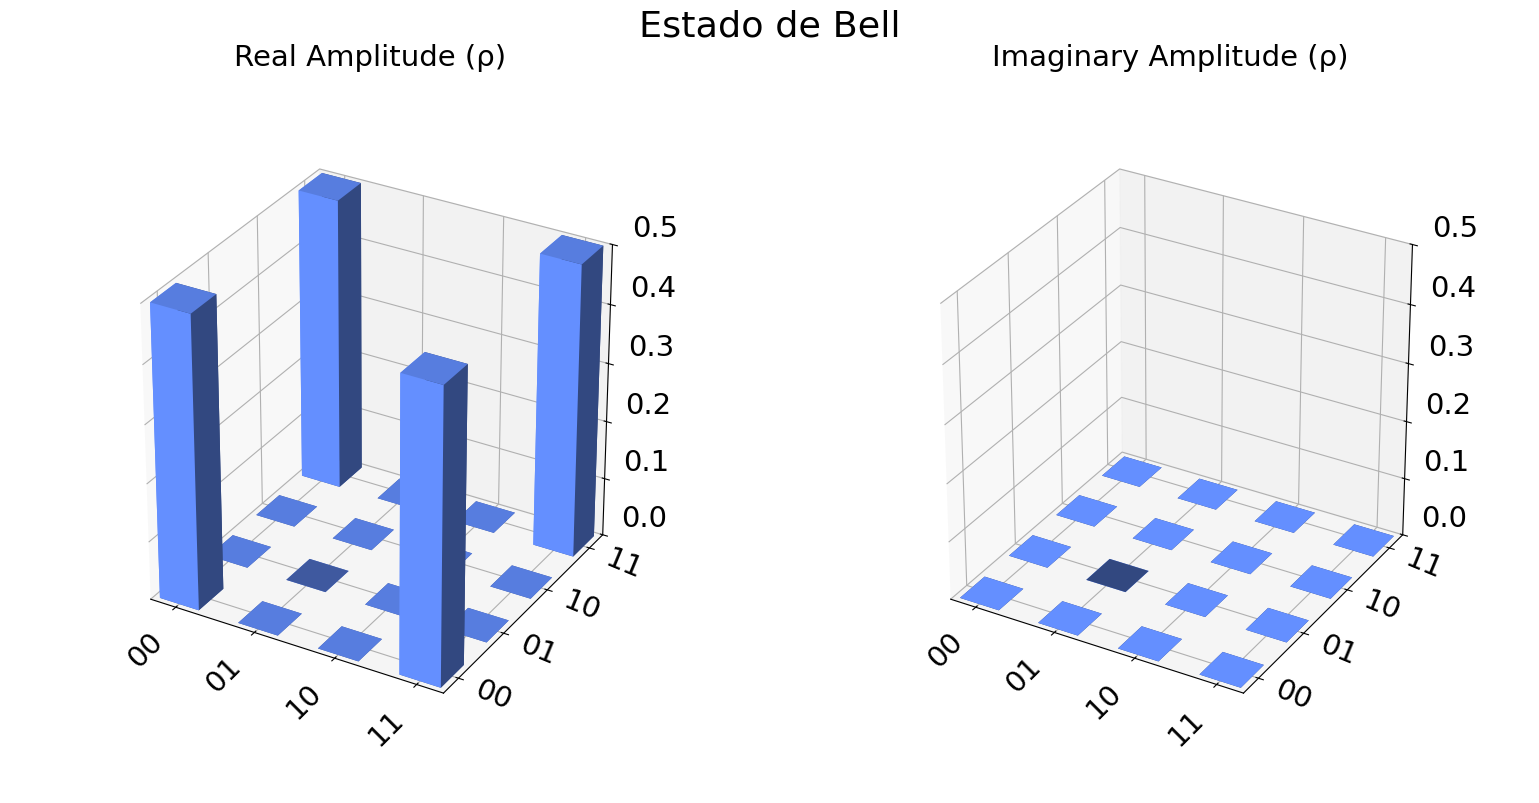

In [451]:
display(Markdown("###Visualización estado de Bell:"))
sv.draw('city', title='Estado de Bell')

# DIAGRAMAS CITYSCAPE Y MATRICES DE DENSIDAD

---

Los diagramas de ciuda o cityscape plots o city plots son herramientas gráficas empleadas en computación cuántica para visualizar la matriz de densidad $\rho$ de un sistema cuántico (vistazo en el notebook anterior) . Esta matriz describe completamente el estado cuántico de un sistema, permitiendo representar tanto estados puros como estados mixtos, lo que nos ayuda en casos donde puede haber ruido, decoherencia o interacción con el entorno.

Para un estado puro $|\psi\rangle$ la matriz de densidad se define como:

$$
\rho = |\psi\rangle \langle \psi|
$$

Sin embargo, el formalismo de la matriz de densidad también permite describir mezclas estadísticas de estados mediante una suma ponderada:

$$
\rho = \sum_i p_i |\psi_i\rangle \langle \psi_i|
$$

donde $ p_i$ son probabilidades clásicas tales que $ \sum_i p_i = 1 $, y cada $|\psi_i\rangle$ es un estado cuántico posible del sistema.

En un diagrama de ciudad, se representa tridimensionalmente cada uno de los elementos  $\rho_{ij}$ de la matriz de densidad. El eje horizontal corresponde a los índices de fila y columna $i$ y $j$, que representan combinaciones de estados base como $|00\rangle$, $|01\rangle, \ldots $ , mientras que el eje vertical indica la magnitud del valor correspondiente. El diagrama suele dividirse en dos gráficas: una para la parte real de $\rho$, y otra para la parte imaginaria.
Podemos destacar en las visualizaciones que las componentes diagonales indican las probabilidades de que el sistema se encuantre en el estado base $|i\rangle$ al medir (util  en este contexto donde no podemos apreciar directamente los estados en la esfera de bloch, como se vera en la siguiente linea de codigo).Mientras que los componentes fuera de la diagonal son conocidas comop **decoherencias cuanticas** contienen información sobre la **superposición** y posibles **correlaciones cuánticas** (como el entrelazamiento) entre los estados.

Por ejemplo, en el caso de un estado de Bell como:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)
$$

la matriz de densidad muestra valores significativos en $\rho_{00,00}$, $\rho_{11,11}$, $\rho_{00,11}$, y $\rho_{11,00}$, lo que se refleja en el diagrama de ciudad como barras altas en esas posiciones tanto en la parte real como en la imaginaria (aunque para este caso particular, las componentes imaginarias son cero). La presencia de coherencias $\rho_{00,11}$ y $\rho_{11,00}$ es una clara manifestación del **entrelazamiento** cuántico.

###ESFERA DE BLOCH PARA ESTADO DE BELL

Vemos que no hay ventor visible mas que un punto en el centro de la esfera, lo cual es una indicacion de estados completamente entrelazados.

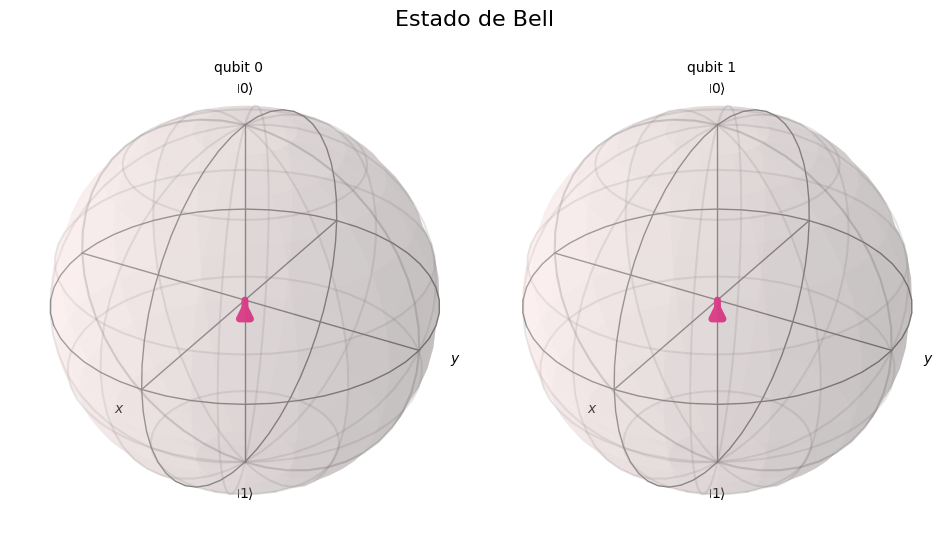

In [452]:
display(Markdown('###ESFERA DE BLOCH PARA ESTADO DE BELL'))
display(Markdown("Vemos que no hay ventor visible mas que un punto en el centro de la esfera, lo cual es una indicacion de estados completamente entrelazados."))

plot_bloch_multivector(statevector, title='Estado de Bell')


#Medición de Qubits: Medición de von Neumann

---

La medición de von Neumann en la base computacional, o medición estándar, toma como entrada un sistema de  $n$ qubits en un estado arbitrario $|\psi\rangle$ y produce una cadena de $n$ bits clásicos (cbits) como salida de la medición, mientras que deja a los qubits en un estado generalmente diferente del estado original |$\psi\rangle$.

Específicamente, una medición estándar cumple con las siguientes propiedades, que son extensiones directas de las propiedades para la medición de un solo qubit:


*  La probabilidad de observar la cadena $n$-bit $x \in \{0,1\}^n$ es

$$
\Pr[\text{salida de la medición} = x] = |\alpha_x|^2 = |\langle x|\psi\rangle|^2
$$

donde $\alpha_x$ es la amplitud compleja asociada al estado $|x\rangle$.

**Ejemplo:**  
Para el estado $|ψ⟩ = \frac{1}{\sqrt{2}}|00⟩ + \frac{1}{\sqrt{2}}|11⟩$:

$$
\begin{aligned}
P(00) &= \left|\frac{1}{\sqrt{2}}\right|^2 = 0.5 \\
P(11) &= \left|\frac{1}{\sqrt{2}}\right|^2 = 0.5 \\
P(01) &= P(10) = 0
\end{aligned}
$$
    
* **Colapso del estado**: Si el resultado medido es $ x $, entonces el estado posterior a la medición de los qubits es $\alpha_x$.
$$
    |ψ⟩ \xrightarrow{\text{medición}} |x⟩
$$

**Ejemplo:**  

Si se mide $|00⟩$ en el estado anterior, el nuevo estado será $|00⟩$ (pérdida de superposición).


Por lo tanto, la medición transforma el estado $|\psi\rangle$, que generalmente es una superposición de estados en la base computacional, en un único estado base $|x\rangle$ con una probabilidad determinada por la amplitud correspondiente.

Como se menciono la base computacional para $n$ qubits es el conjunto de todos los posibles estados $|x⟩$ donde $x ∈ \{0,1\}^n$.

**Ejemplo:**

Para 2 Qubits
$$
\{|00⟩, |01⟩, |10⟩, |11⟩\}
$$

Un sistema de $n$ qubits que sólo puede tomar estados $|x\rangle$en la base computacional se comporta como un sistema determinista de bits clásicos (cbits), dado que al medir $|x\rangle$ el resultado será $x $ con probabilidad 1 y el estado no cambiará.


Una medición estándar sobre  $n$ qubits puede implementarse aplicando mediciones estándar individuales a cada qubit por separado. Cada bit clásico  $x_k$ de la salida de la medición corresponde a la medición del qubit $k$-ésimo. Además, estas mediciones pueden realizarse en cualquier orden, incluso simultáneamente, sin alterar la distribución de probabilidad dada por la regla de Born.



###Estado antes de la medicion

Vector de estado:
```
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
```

###probabilidasdes teoricas:


 * estado |00⟩ :0.5000000000000001
 * estado |11⟩ :0.4999999999999999


### Circuito cuantico pre-medicion:

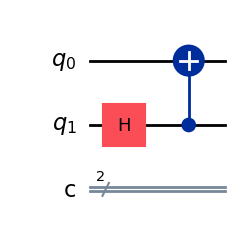

In [453]:
#EJEMPLO: medicion del estado de Bell


#nuevamente creamos un circuito
qc_1 = QuantumCircuit(2, 2)                                      # 2 qubits, 2 bits clásicos para almacenar el resultado

#este pequeño circuito contruye un estado de bell (altamente entrelazado)
qc_1.h(1)                                                       # Aplicamos Hadamard al qubit 0
qc_1.cx(1, 0)                                                   # Aplicamos CNOT (crea entrelazamiento)

state_pre = Statevector(qc_1)                                   #veamos el estado antes de la medicion
probabilidades_teoricas = np.abs(statevector.data)**2           #probabilidades teoricas

display(Markdown("###Estado antes de la medicion"))             #no se ecxplico anteriormente pero la libreria IPython.display
display(Markdown(f"Vector de estado:\n```\n{state_pre}\n```"))  #se usara recurrentemente para presentar resultado de ejecucion
display(Markdown("###probabilidasdes teoricas:"))               #de forma elegante y entendible
display(Markdown(f"""
 * estado |00⟩ :{probabilidades_teoricas[0]}
 * estado |11⟩ :{probabilidades_teoricas[-1]}
"""))



display(Markdown("### Circuito cuantico pre-medicion:"))

qc_1.draw('mpl')                                                #dibujamos el circuito


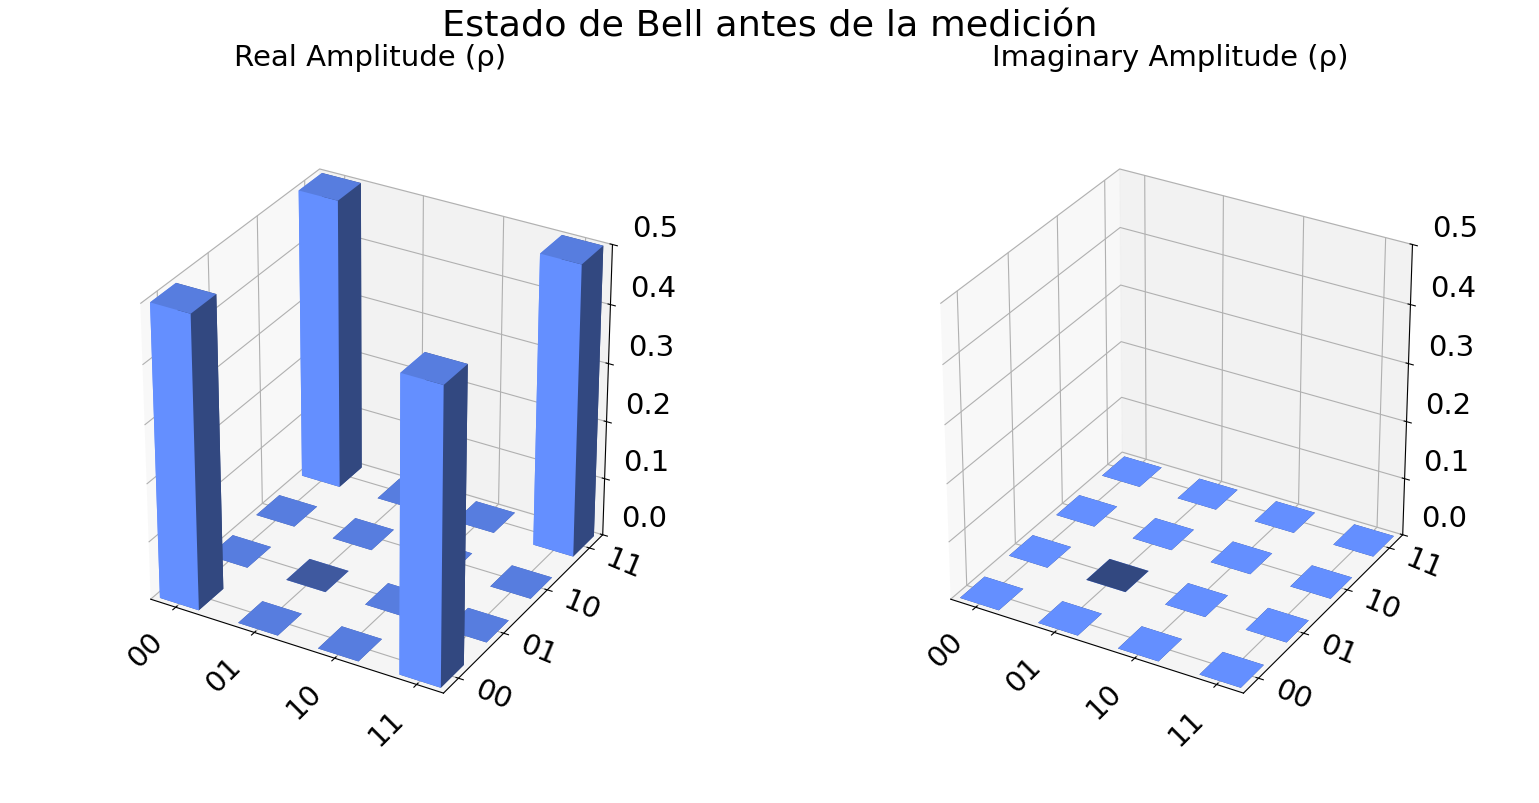

In [454]:
#diagrama city
state_pre.draw('city', title='Estado de Bell antes de la medición')


### Circuito cuantico post-medicion:

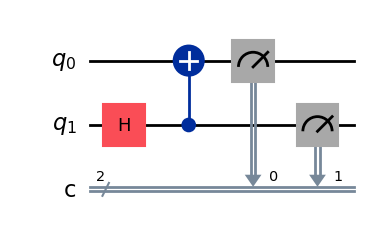

In [455]:
qc_1.measure([0, 1], [0, 1])   #medimos

#simulacion
simulator = AerSimulator()              #incializamos el simulador
job = simulator.run(qc_1, shots = 1000) #corremos el circuto qc_1 con mil ejecuciones
result = job.result()                   #guardamos los resultados
counts = result.get_counts()            #obtenemos la frecuencia de cada resultado

display(Markdown("### Circuito cuantico post-medicion:"))

qc_1.draw('mpl')                         #dibujamos el circuito

###Distribucion de la medida:

**Resultados de la medición (1000 shots):**

```python
{'11': 530, '00': 470}
```

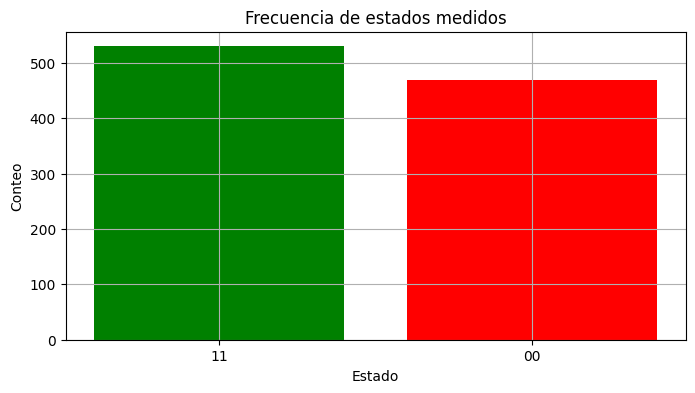

In [462]:
#GRAFICAMOS EL HISTOGRAMA DE LA EJECUCION DEL SIMULADOR
display(Markdown('###Distribucion de la medida:'))
display(Markdown("**Resultados de la medición (1000 shots):**"))
display(Markdown(f"```python\n{counts}\n```"))
plt.figure(figsize=(8,4))
plt.bar(counts.keys(),counts.values(), color = ['green','red'])
plt.title("Frecuencia de estados medidos")
plt.xlabel("Estado")
plt.ylabel("Conteo")
plt.grid()


In [463]:
display(Markdown("### Probabilidades teóricas vs experimentales:"))
prob_00 = counts.get('00', 0)/1000
prob_11 = counts.get('11', 0)/1000

display(Markdown(f"""
| Estado | Teórico | Experimental |
|--------|---------|--------------|
| 00     | 50%     | {prob_00:.1%} |
| 11     | 50%     | {prob_11:.1%} |
"""))

### Probabilidades teóricas vs experimentales:


| Estado | Teórico | Experimental |
|--------|---------|--------------|
| 00     | 50%     | 47.0% |
| 11     | 50%     | 53.0% |


### Circuitos Cuánticos y Operaciones Locales

---
Aunque ya lo hamos dinujado y hemos tenido un hacercamiento al concepto de **circuitos cuanticos**, vale  la pena estuydiarlos un poco mas a fondo. Un circuito cuántico es una representación gráfica y matemática de cómo se aplica una secuencia de **transformaciones unitarias** a un conjunto de qubits a lo largo del tiempo.

Como en ejemplos anterios cada qubit se representa con un "hilo" horizontal en el circuito. Las operaciones cuánticas se aplican en orden, de izquierda a derecha y estas operaciones son  de forma matricial  y **unitarias**  $U$ y como se vio anteriormente cumplen que:

$$
UU^\dagger = U^\dagger U = I,
$$
  
donde $I$ es la matriz identidad de dimensión $2^n \times 2^n$.Puertas Cuánticas

###PUERTAS CUANTICAS
Las puertas cuánticas son operaciones representadas por matrices unitarias de pequeña dimensión:

* **Puertas de un solo qubit**: matrices $2 \times 2$.
* **Puertas de dos qubits**: matrices $4 \times 4$.


Estas puertas se combinan para construir una transformación más grande sobre todo el sistema de qubits.

### OPERACIONES LOCALES
Las **operaciones locales** son aquellas que se aplican independientemente a cada qubit. Se construyen usando el **producto de Kronecker** (o producto tensorial) de matrices unitarias. Si se aplica una puerta $U_A$ al primer qubit y $U_B$  al segundo qubit, la transformación total es:

$$U = U_A \otimes U_B.$$

Esto representa que cada qubit es transformado de forma separada, sin interacción entre ellos.

### Ejemplo:
Dado un estado de dos qubits en la base computacional:

$$
  |\psi\rangle = \alpha_{00}|00\rangle + \alpha_{01}|01\rangle + \alpha_{10}|10\rangle + \alpha_{11}|11\rangle,
$$

si se aplican puertas locales $U_A$ y $U_B$ , el nuevo estado será:

$$
  U|\psi\rangle = \sum_{x,y \in \{0,1\}} \alpha_{xy} \left( U_A|x\rangle \otimes U_B|y\rangle \right).
$$

Esto muestra que cada término de la superposición es transformado por separado por las respectivas puertas.

### Ejemplo:

Consideremos un sistema de dos qubits en el estado base  $|01\rangle $, y apliquemos dos puertas cuánticas locales:


* Al primer qubit: la compuerta de Pauli-X, que es:
$$
X = \begin{bmatrix}  0 & 1 \\  1 & 0  \end{bmatrix}
$$
  
* Al segundo qubit: la compuerta Hadamard \( H \), que es:
$$
H = \frac{1}{\sqrt{2}}\begin{bmatrix}  1 & 1 \\  1 & -1 \end{bmatrix}
$$


La transformación total sobre el sistema de dos qubits se da por el producto de Kronecker:
$$
U = X \otimes H.
$$

Calculamos este producto:

$$
U = \begin{bmatrix} 0 & 1 \\1 & 0\end{bmatrix}\otimes \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\1 & -1\end{bmatrix}= \frac{1}{\sqrt{2}}
\begin{bmatrix}0 \cdot H & 1 \cdot H \\1 \cdot H & 0 \cdot H\end{bmatrix}= \frac{1}{\sqrt{2}}
\begin{bmatrix} 0  & 0 & 1 & 1 \\ 0 & 0 & 1 & -1 \\ 1 & 1 & 0 & 0 \\ 1 & -1 & 0 & 0   \end{bmatrix}
$$

El estado $|01\rangle$ se representa como:

$$
|01\rangle = \begin{bmatrix} 0 \\1 \\0 \\0\end{bmatrix}
$$

Aplicamos la transformación:

$$
U |01\rangle = \frac{1}{\sqrt{2}}\begin{bmatrix} 0  & 0 & 1 & 1 \\ 0 & 0 & 1 & -1 \\ 1 & 1 & 0 & 0 \\ 1 & -1 & 0 & 0   \end{bmatrix}\begin{bmatrix}0 \\1 \\0 \\0\end{bmatrix}= \frac{1}{\sqrt{2}} \begin{bmatrix}0 \\0 \\1 \\-1\end{bmatrix}
$$

Por lo tanto, el estado resultante es:

$$
|\psi\rangle = \frac{1}{\sqrt{2}}(|10\rangle -  |11\rangle)
$$

vemos que es  estado es una superposición de dos estados base, generado mediante operaciones locales sobre qubits independientes.


### Estado antes de la medicion:

```
Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
```

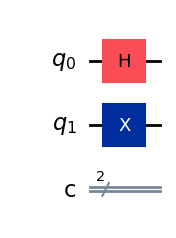

In [464]:
###Simulacion:

#definimos el estado inicial en 01
state_initial = Statevector.from_label('01')  #NOTA: qiskit tene la notacion de qubits Bra-ket invertida

#circuito cuantico

qc_2 = QuantumCircuit(2,2)  # 2 Qubits y 2 Cbits

qc_2.x(1)                   # Aplicamos X al primer qubit (índice 1) y H al segundo (índice 0)
qc_2.h(0)




display(Markdown("### Estado antes de la medicion:"))
display(Markdown(f"```\n{state_initial}\n```"))
qc_2.draw('mpl')           #circuito cuantico

### Estado resultante:

```
Statevector([ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
             -0.70710678+0.j],
            dims=(2, 2))
```

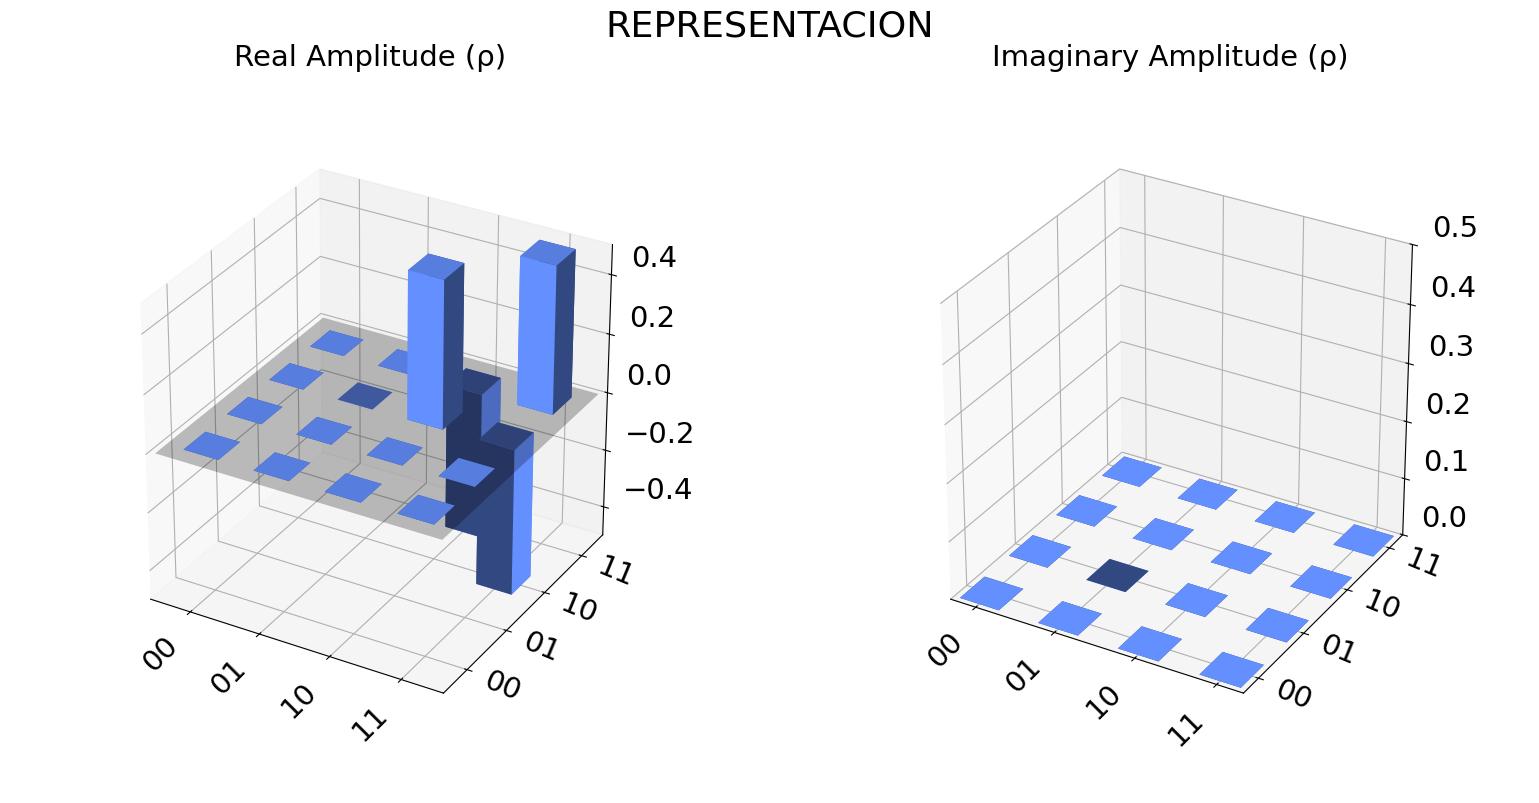

In [334]:
#evolucionalos el estado
state_final2 = state_initial.evolve(qc_2)
display(Markdown("### Estado resultante:"))
display(Markdown(f"```\n{state_final2}\n```"))



state_final2.draw('city',title = 'REPRESENTACION')

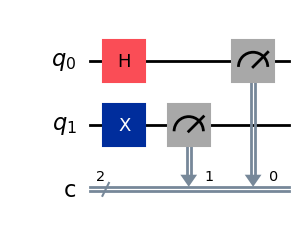

In [335]:
#Mediciones
qc_2.measure([1, 0],[1,0])

qc_2.draw('mpl')

# Entrelazamiento Cuántico

---

Aunque hemos hablado en multiples ocaciones, en esta oportunidad explicaremos más a detalle esta propiedad.

El entrelazamiento es una capacidad especial de los sistemas cuánticos cuando se tienen varios qubits juntos. A diferencia de los bits clásicos (que pueden ser 0 o 1), los qubits pueden estar en superposición y, además pueden estar entrelazados, lo que significa que el estado de un qubit depende del estado del otro y por tanto no pueden describirse de forma independiente.

---

## Estados separables vs estados entrelazados

### Estados separables:

Cuando se tienen dos qubits, si su estado conjunto se puede escribir como el  producto de Kronecker  de los estados individuales de cada qubit, decimos que esos qubits están **separables**. Es como decir que cada qubit tiene su propio estado independiente y no se afectan entre sí.

Por ejemplo, si el primer qubit está en

$$
|\psi_A\rangle = \alpha_A^0 |0\rangle + \alpha_A^1 |1\rangle
$$

y el segundo en

$$
|\psi_B\rangle = \alpha_B^0 |0\rangle + \alpha_B^1 |1\rangle,
$$

entonces el estado total es el producto:

$$
|\psi_A\rangle \otimes |\psi_B\rangle = \alpha_0^A \alpha_0^B |00\rangle + \alpha_0^A \alpha_1^B|01\rangle + \alpha_1^A \alpha_0^B |10\rangle+ \alpha_1^A \alpha_1^B |11\rangle.
$$

###Estados entrelazados:

Si no se puede escribir el estado conjunto como producto de estados individuales, entonces los qubits están  **entrelazados**. Esto significa que el estado de uno no puede describirse sin tener en cuenta al otro. Es una correlación mucho más fuerte que la clásica.

por ejemplo el estado de Bell que se ha venido discutiendo:

Un ejemplo de estado entrelazado muy conocido es el estado de Bell $|\Phi^+\rangle$, que es:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle).
$$

Este estado no  se puede factorizarse como el producto de dos estados individuales como se vio en el anterior ejemplo. En este caso, si se mide el primer qubit y se obtiene un 0, automáticamente se sabe que el segundo qubit también es 0, y lo mismo si se obtiene un 1. No importa la distancia entre ellos, están **"conectados"** de esta manera (como vimos con la esfera de bloch en los diagramas cityscape).

En este contexto el entrelazamiento es clave para muchos fenómenos y aplicaciones en computación cuántica, como la teletransportación cuántica, la criptografía cuántica y algoritmos cuánticos que superan a los clásicos.

Cuando se miden los qubits, el entrelazamiento desaparece, porque la medición colapsa el estado cuántico a un estado clásico, donde los qubits ya no están en superposición ni entrelazados.

###Ejemplo
comportamiento no clásico de qubits entrelazados con el estado de Bell $|\Phi^+\rangle\$, consideremos dos qubits en el estado de Bell:
$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle).
$$

Si medimos estos dos qubits directamente en la base computacional (es decir, en la base $|0\rangle\$, $|1\rangle$ , según la regla de Born, obtenemos:

*  Resultado $00$ con probabilidad $1/2$,
*  Resultado $11$ con probabilidad $1/2$,
*  Nunca salen $01$ ni $10$.


Este comportamiento es análogo a tener dos bits clásicos correlacionados que están en el estado $00$ o $11$ con igual probabilidad, es decir, con vector de probabilidad conjunto
(ya sabemos que no son lo mismo).
$$
p = \begin{bmatrix}
1/2 \\ 0 \\ 0 \\ 1/2
\end{bmatrix}.
$$

Ahora supongamos que aplicamos una compuerta Hadamard $H$ a cada qubit localmente antes de medir:

$$
(H \otimes H)|\psi\rangle,
$$

donde la compuerta Hadamard transforma

$$
H|0\rangle = |+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}, \quad
H|1\rangle = |-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}.
$$

Ahora, supongamos incorrectamente que los qubits en la entrada están en $|00\rangle$ o $|11\rangle$ con igual probabilidad, como bits clásicos correlacionados. Aplicamos la compuerta Hadamard a cada:


$$
(H \otimes H)|00\rangle = H|0\rangle \otimes H|0\rangle = |+\rangle \otimes |+\rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle),
$$

$$
(H \otimes H)|11\rangle = H|1\rangle \otimes H|1\rangle = |-\rangle \otimes |-\rangle = \frac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle).
$$

Por la ley total de probabilidades, medir en esta base daría cualquiera de las cuatro cadenas $00, 01, 10, 11$ con igual probabilidad $1/4$.

Entonces si antes tenías dos bits clásicos que siempre valían igual (ambos 0 o ambos 1), ahora tras aplicar Hadamard se vuelven “independientes”, como lanzar dos monedas justas independientes.

Pero el comportamiento real del estado de Bell, cuando aplicamos $H \otimes H$ al estado  $|\Phi^+\rangle$ es:

$$
(H \otimes H)|\Phi^+\rangle = \frac{1}{\sqrt{2}} (H \otimes H)(|00\rangle + |11\rangle) = \frac{1}{2\sqrt{2}} \big[(|00\rangle + |01\rangle + |10\rangle + |11\rangle) + (|00\rangle - |01\rangle - |10\rangle + |11\rangle) \big].
$$

Simplificando:

$$
= \frac{1}{2\sqrt{2}} (2|00\rangle + 0 + 0 + 2|11\rangle) = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) = |\Phi^+\rangle.
$$

Esto indica que el estado $|\Phi^+\rangle$ no cambia bajo la acción de $H \otimes H$ . Por lo tanto, la medición sigue produciendo sólo los resultados 00 o 11 con probabilidad $1/2$.

Este ejemplo muestra que los qubits en estados entrelazados no se comportan como bits clásicos correlacionados, debido a cómo responden a transformaciones cuánticas y la operación Hadamard local destruye la correlación entre bits clásicos correlacionados, pero preserva la correlación entre qubits entrelazados en $|\Phi^+\rangle$.

ESTADO DE BELL

```
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
```

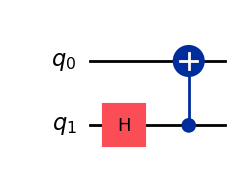

In [465]:
#configuracion circuito
simulador  =AerSimulator()

qc_bell = QuantumCircuit(2) #ambos qubits en 00
qc_bell.h(1)
qc_bell.cx(1,0)

statevector_BELL = Statevector(qc_bell)

display(Markdown("ESTADO DE BELL"))
display(Markdown(f"```\n{statevector_BELL}\n```"))


qc_bell.draw('mpl')  # |Φ⁺⟩ = (|00⟩ + |11⟩)/√2 estado de bell



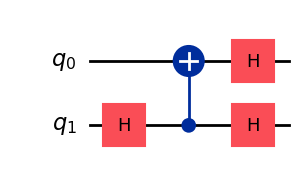

In [466]:
qc_bell_state = QuantumCircuit(2)
qc_bell_state.h(1)
qc_bell_state.cx(1, 0)
qc_bell_state.h([1,0])  # (H⊗H)|Φ⁺⟩

qc_bell_state.draw('mpl')

In [467]:

statevector_BELL_STATE = Statevector(qc_bell_state)

display(Markdown("ESTADO DE BELL CON Hadamard"))
display(Markdown(f"```\n{statevector_BELL_STATE}\n```"))  # tenemos como se predijo ∣Φ+⟩

ESTADO DE BELL CON Hadamard

```
Statevector([7.07106781e-01+0.j, 2.29934717e-17+0.j, 2.29934717e-17+0.j,
             7.07106781e-01+0.j],
            dims=(2, 2))
```

In [468]:
#medidiones
qc_bell_meas = QuantumCircuit(2, 2)
qc_bell_meas.compose(qc_bell_state, inplace=True)
qc_bell_meas.measure_all()

qc_bell_h_meas = QuantumCircuit(2, 2)
qc_bell_h_meas.compose(qc_bell, inplace=True)
qc_bell_h_meas.measure_all()


In [469]:
#mediciones
result_bell = simulator.run(qc_bell_meas, shots=1000).result()
counts_bell = result_bell.get_counts()

result_bell_h = simulator.run(qc_bell_h_meas, shots=1000).result()
counts_bell_h = result_bell_h.get_counts()


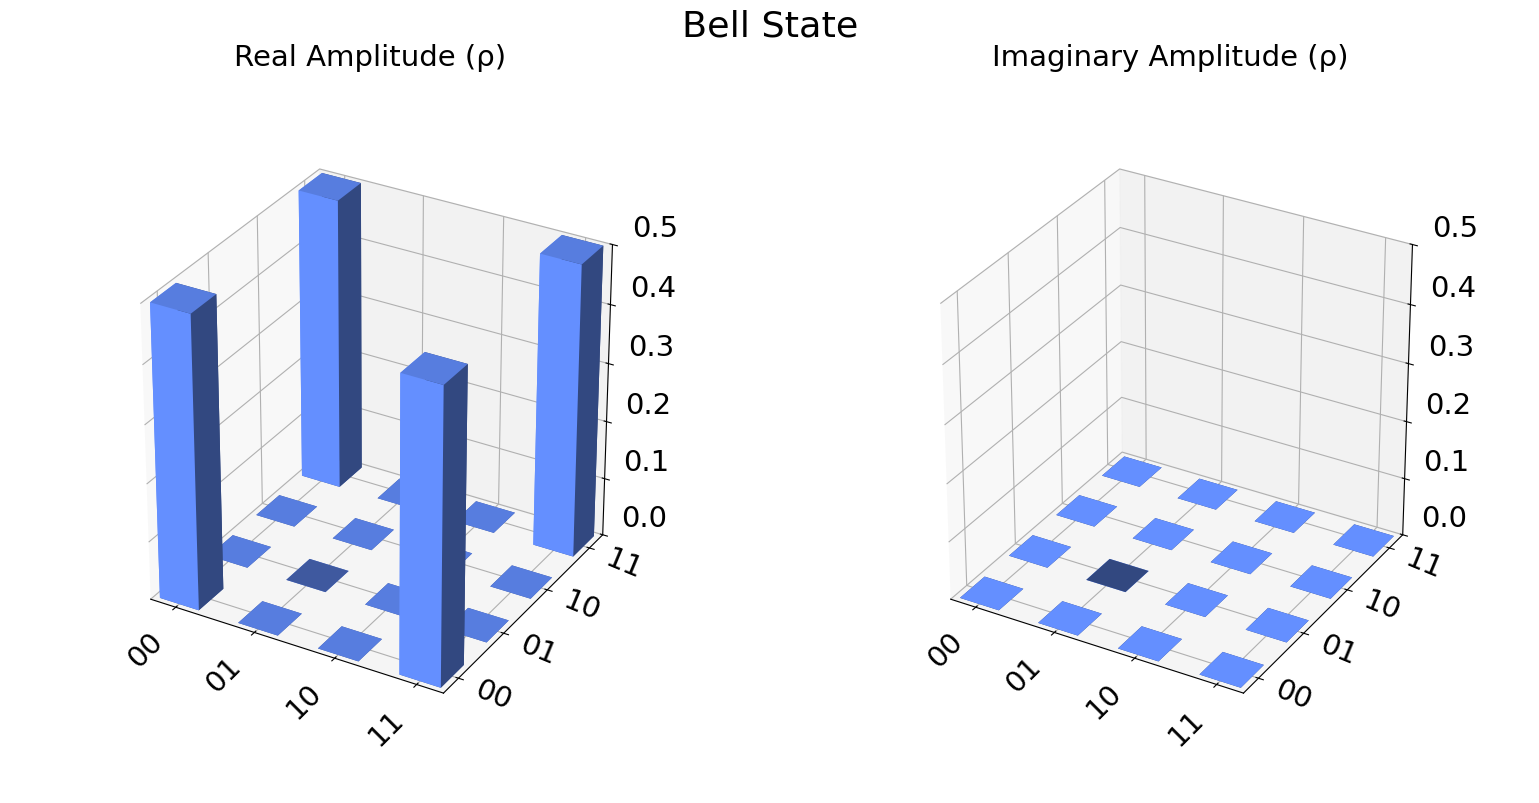

In [470]:
# Obtener estados
bell_state = Statevector(qc_bell)
bell_state_h = Statevector(qc_bell_state)

bell_state.draw('city', title='Bell State')

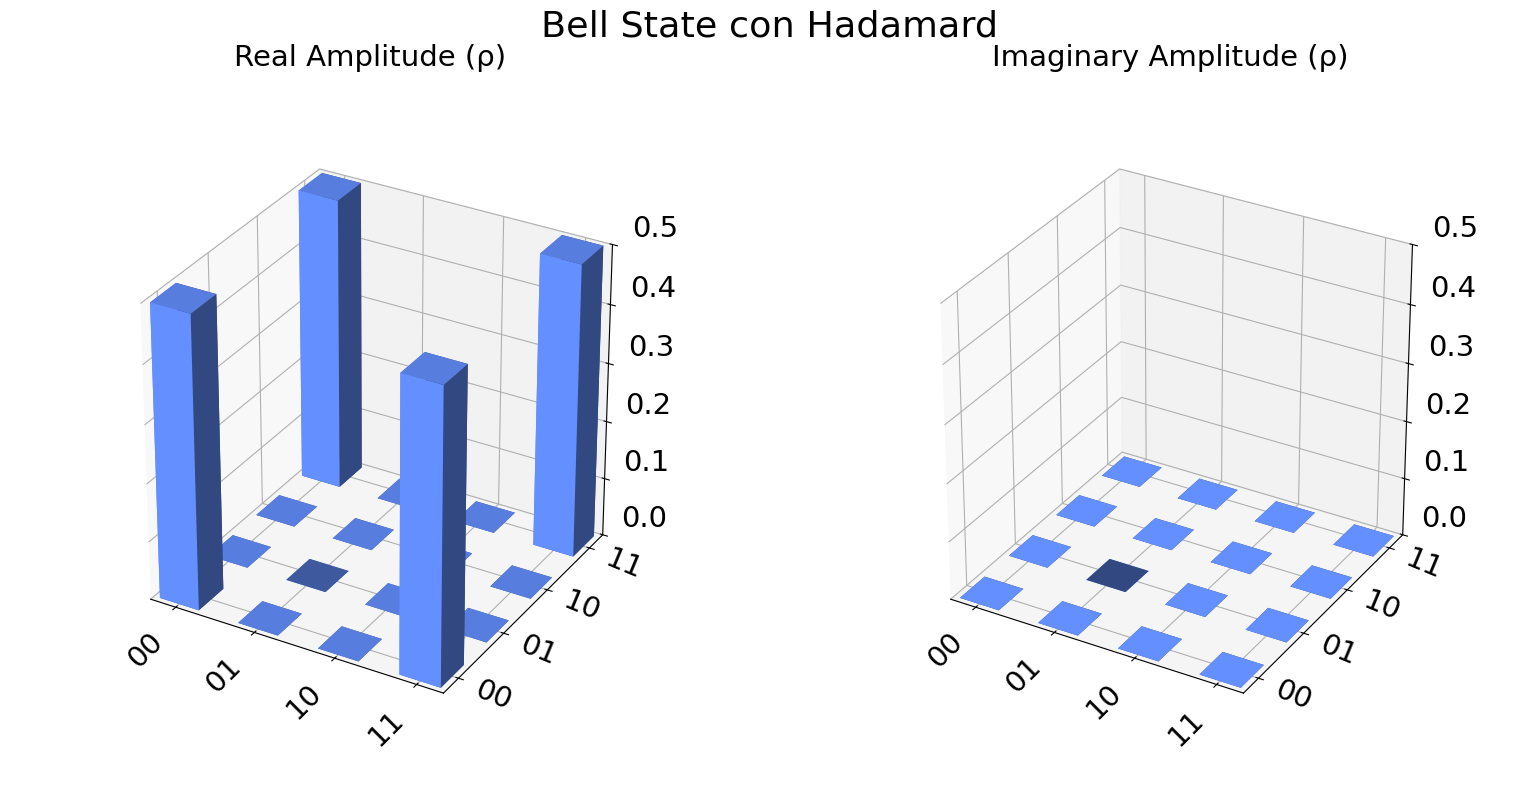

In [471]:
bell_state_h.draw('city', title='Bell State con Hadamard')

Text(0.5, 1.0, 'Mediciones con Hadamard')

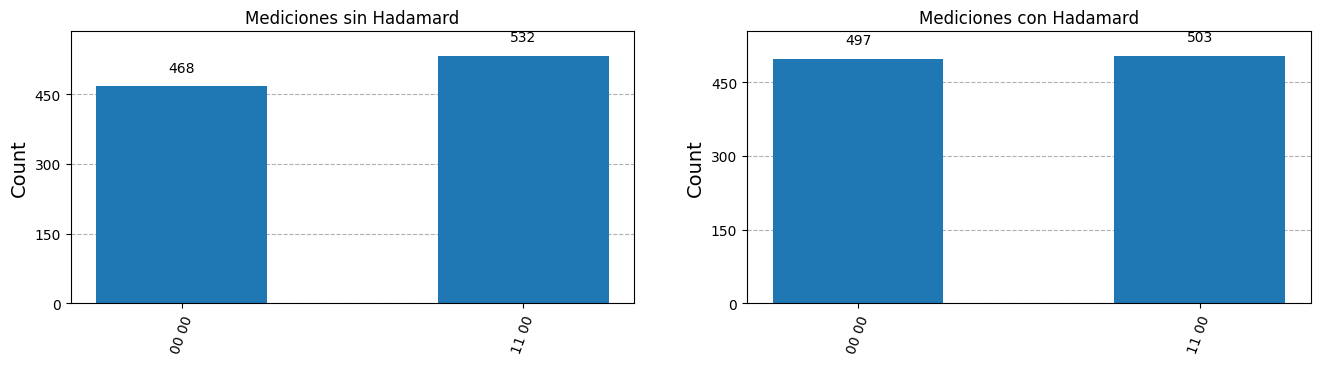

In [472]:
# Crear figura principal
fig = plt.figure(figsize=(16, 12))

# Resultados de medición
ax1 = fig.add_subplot(321)
plot_histogram(counts_bell, ax=ax1)
ax1.set_title("Mediciones sin Hadamard")

ax2 = fig.add_subplot(322)
plot_histogram(counts_bell_h, ax=ax2)
ax2.set_title("Mediciones con Hadamard")


#Estados entrelazados como superposiciones de estados separables

---


Un hecho innegable de los estados entrelazados es que se pueden expresar como superposiciones multiples de estados entrelazados y  estados separables. Esto se deduce directamente del hecho de que los $2^n$ vectores en la base computacional son separables. Por lo tanto, una superposición general es, de hecho, una combinación lineal de estados separables.

Más generalmente, dada una base ortonormal $\{|v_{x_k}\rangle\}_{x_k=0}^1$ para cada qubit $k \in \{0, 1, \ldots, n-1\}$, una base ortonormal para el espacio de Hilbert de dimensión $2^n$ de un sistema de $n$ qubits se puede obtener como el conjunto de todos los estados de la forma
$$
\{|v_{x_0}\rangle \otimes |v_{x_1}\rangle \otimes \cdots \otimes |v_{x_{n-1}}\rangle \}.
$$
De aquí se sigue que cualquier estado cuántico para $n$ qubits puede escribirse como la superposición
$$
|\psi\rangle = \sum_{x_0=0}^1 \sum_{x_1=0}^1 \cdots \sum_{x_{n-1}=0}^1 \alpha_{x_0,x_1,\ldots,x_{n-1}} \, |v_{x_0}\rangle \otimes |v_{x_1}\rangle \otimes \cdots \otimes |v_{x_{n-1}}\rangle,
$$
donde los coeficientes complejos $\alpha_{x_0,x_1,\ldots,x_{n-1}}$ satisfacen la normalización $\sum |\alpha|^2 = 1$.

Más ampliamente, podemos descomponer el conjunto de $n$ qubits en $K$ subconjuntos, cada uno con $n_k$ qubits, tal que $\sum_{k=0}^{K-1} n_k = n$. Denotando como $\{|v_{x_k}\rangle\}_{x_k=0}^{2^{n_k}-1}$ cualquier base ortonormal para el espacio de Hilbert de dimensión $2^{n_k}$ correspondiente al subconjunto $k$-ésimo de qubits, una base ortonormal para el espacio de Hilbert de dimensión $2^n$ para los $n$ qubits se obtiene como el conjunto de todos los estados de la forma
$$
\{|v_{x_0}\rangle \otimes |v_{x_1}\rangle \otimes \cdots \otimes |v_{x_{K-1}}\rangle\}.
$$
En consecuencia, podemos escribir el estado de los $n$ qubits como la superposición
$$
|\psi\rangle = \sum_{x_0=0}^{2^{n_0}-1} \sum_{x_1=0}^{2^{n_1}-1} \cdots \sum_{x_{K-1}=0}^{2^{n_{K-1}}-1} \alpha_{x_0,x_1,\ldots,x_{K-1}} \, |v_{x_0}\rangle \otimes |v_{x_1}\rangle \otimes \cdots \otimes |v_{x_{K-1}}\rangle.
$$

#COMPUERTAS MULTI QUBIT

---

Como hemos visto, los sistemas cuánticos de n qubits evolucionan mediante matrices unitarias de tamaño $2\times 2$ , que representan transformaciones lineales, reversibles y que conservan la norma. Aunque en teoría cualquier matriz unitaria es realizable, en la práctica solo se pueden implementar aquellas que se descomponen en secuencias cortas de puertas de 1 y 2 qubits. Para ser factibles, dichas secuencias deben crecer de forma polinómica con n, no exponencialmente.

### OPERACIONES LOCALES EN COMPUERTAS MULTI QUBIT

La forma más simple de aplicar una operación unitaria a $n$ qubits es mediante puertas de un solo qubit aplicadas (localmente) a cada uno. Estas operaciones se representan como el producto de Kronecker como hemos visto:

$$
U = U_0 \otimes U_1 \otimes \cdots \otimes U_{n-1}
$$

Un caso importante son las cadenas de matrices de Pauli. Sea $P_0 = I$, $P_1 = X$, $P_2 = Y$, $P_3 = Z$. Entonces, una cadena de Pauli se define como:

$$
P^{\vec{s}} = P_{s_0} \otimes P_{s_1} \otimes \cdots \otimes P_{s_{n-1}}, \quad \vec{s} \in \{0,1,2,3\}^n
$$

Donde podemos definir la **carga** (weight) de una cadena de Pauli es el número de factores que son diferentes de la identidad $I$.

Ademas cualquier matriz $A \in \mathbb{C}^{2^n \times 2^n}$ con entradas acotadas se puede escribir como una combinación lineal de cadenas de Pauli:

$$
A = \sum_{\vec{s} \in \{0,1,2,3\}^n} a_{\vec{s}} P^{\vec{s}}
$$

y se cumple ademas que los coeficientes $a_{\vec{s}}$ están dados por:

$$
a_{\vec{s}} = \frac{1}{2^n} \, \text{tr}(A P^{\vec{s}})
$$

Si $A$ es hermítica, los $a_{\vec{s}}$ son reales.

* Si $A$ es unitaria, el vector de coeficientes $\{a_{\vec{s}}\}$ tiene norma unitaria y Así, las operaciones cuánticas sobre múltiples qubits pueden descomponerse como combinaciones lineales de operaciones locales, al igual que en el caso de los estados cuánticos separables.


#Ejemplo

Sea la siguiente matriz unitaria de $2^2 \times 2^2 = 4 \times 4$:

$$
A = X \otimes X =
\begin{bmatrix}
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0
\end{bmatrix}
$$

Queremos escribirla como una combinación lineal de los productos de matrices de Pauli. Recordemos las matrices de Pauli:

$$
I,X,Y,Z = \{s_0,s_1,s_2,s_3\}
$$

Todas las posibles combinaciones de 2 matrices de Pauli (para 2 qubits) son $4^2 = 16$, y forman una base ortonormal (respecto al producto traza escalar).

La descomposición es:

$$
A = \sum_{s_0=0}^3 \sum_{s_1=0}^3 a_{(s_0,s_1)} \, P_{s_0} \otimes P_{s_1}
$$

Los coeficientes se calculan como:

$$
a_{(s_0,s_1)} = \frac{1}{4} \, \text{tr}\left[(X \otimes X)(P_{s_0} \otimes P_{s_1})\right]
= \frac{1}{4} \, \text{tr}(X P_{s_0}) \cdot \text{tr}(X P_{s_1})
$$

Sabemos que:

* $\text{tr}(X X) = \text{tr}(I) = 2$
* $\text{tr}(X Y) = \text{tr}(X Z) = 0$
* $\text{tr}(X I) = \text{tr}(X) = 0$

Entonces el único término no nulo es cuando $s_0 = s_1 = 1$, es decir:

$$
a_{(1,1)} = \frac{1}{4} \cdot \text{tr}(X X) \cdot \text{tr}(X X) = \frac{1}{4} \cdot 2 \cdot 2 = 1
$$

Tenemos:

$$
X \otimes X = P_1 \otimes P_1 = \sum_{s_0,s_1} a_{(s_0,s_1)} P_{s_0} \otimes P_{s_1} = a_{(1,1)} P_1 \otimes P_1 = P_1 \otimes P_1
$$


Por lo tanto, la matriz $X \otimes X$ ya es una cadena de Pauli. Su descomposición como combinación lineal tiene peso 1, ya que solo contiene un término no nulo.


#Puertas Cuánticas Controladas

Una **compuerta cuántica controlada** se  denotada como **CU**, es una operación de **dos o más qubits** donde una compuerta cuántica $U$ se aplica  de forma condicional, Si uno o más **qubits de control** están en el estado $|1\rangle$, entonces se aplica $U$ a uno o más qubits objetivo, si los controles están en $|0\rangle$, no se hace nada.

Lo cual introduce una **lógica condicional cuántica**, análoga al compuerta digital  XOR digital, pero con la diferencia de que los qubits pueden estar en **superposición**. Para el caso más simple: una puerta controlada de un solo qubit de control (qubit 0) y un objetivo (qubit 1) se puede expresar de la siguiente forma:

$$
CU_{01} = |0\rangle\langle 0| \otimes I + |1\rangle\langle 1| \otimes U
$$

En lo que podemos inferir que $|0\rangle\langle 0|$ actúa como una especie de filtro que solo actúa si el qubit de control está en $|0\rangle$ y $|1\rangle\langle 1|$ hace lo mismo para el caso en que el control esté en $|1\rangle$ $\otimes$ es el **producto tensorial**, que representa cómo se combinan los espacios de Hilbert de los dos qubits $I$ es la **identidad**: no cambia el qubit objetivo.

Es facil demostrar que  $(CU_{01})^\dagger(CU_{01}) = I$   lo que implica que el teorema espectral respalda su diagonalización y unitariedad, garantizando que los autovalores de U (y por extensión
CU) tienen módulo 1.

Ademas se pueden escribir como una combinacion lieal de lod vectores de la base computacional:

$$
CU_{01}|00\rangle  = (|0\rangle \langle 0|  \otimes  I + |1\rangle \langle 1| \otimes U )(|0\rangle \otimes |0\rangle) = |0\rangle \langle 0|0\rangle \otimes |0\rangle + |1\rangle \langle 1|0\rangle \otimes U |0\rangle = |00\rangle
$$


Dado que hay dos qubits, el sistema completo tiene dimensión $2^2 = 4$, y la matriz de $CU$ es de $4 \times 4$. Se representa de la siguiente forma  teniendo en cuanta que $U$ es una transformacion de $2 \times 2$:

$$
U = \begin{bmatrix} u_{11} & u_{12} \\ u_{21} & u_{22} \end{bmatrix}
$$

Entonces:

$$
CU = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{11} & u_{12} \\
0 & 0 & u_{21} & u_{22}
\end{bmatrix}
$$

Esto actúa sobre el sistema en orden de base:
$|00\rangle, |01\rangle, |10\rangle, |11\rangle$

En otras opalabras podemos pensar en esta tranformacion como  $|\psi\rangle = |\text{control}, \text{objetivo}\rangle$, entonces su aplicacion genera:

* $CU|00\rangle = |00\rangle$
* $CU|01\rangle = |01\rangle$  
* $CU|10\rangle = |1\rangle \otimes U|0\rangle$
* $CU|11\rangle = |1\rangle \otimes U|1\rangle$

Solo los estados donde el control está en $|1⟩$ sufren cambio en el qubit objetivo.Un ejemplo que ya hemos visto es la compuerta CNOT (controlada-X) la cual es el caso particular de una **puerta controlada-X**, es decir, se aplica $X$ al qubit objetivo si el control está en $|1\rangle$.

La compuerta $X$ es:

$$
X = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$

Entonces:

$$
\text{CNOT} = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$

odteniendo las tranformaciones:

* $|00\rangle \to |00\rangle$
* $|01\rangle \to |01\rangle$
* $|10\rangle \to |11\rangle$
* $|11\rangle \to |10\rangle$

En otras palabras el segundo bit se invierte **si y solo si** el primero es $1$.

##Efecto sobre superposiciones y entrelazamiento

Supongamos que el control está en superposición:

$$
|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle), \quad |\phi\rangle = |0\rangle
$$

Aplicamos $CU$:

$$
CU(|\psi\rangle \otimes |\phi\rangle) = \frac{1}{\sqrt{2}}(|0\rangle \otimes |\phi\rangle + |1\rangle \otimes U|\phi\rangle)
$$

Esto genera **entrelazamiento** si $U|\phi\rangle \neq |\phi\rangle$, porque ya no se puede escribir el estado final como un producto de estados individuales.


#Ejemplo

Trabajaremos sobre el estado inicial $|00\rangle$ y aplicaremos las compuertas $h$ y $R_Y$.


El sistema comienza en:

$$
|\psi_0\rangle = |00\rangle =
\begin{bmatrix}
1 \\ 0 \\ 0 \\ 0
\end{bmatrix}
$$

Recordemos que este vector está en base computacional como:
$\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}$

Aplicamos  la compuerta Hadamard actúa sobre el primer qubit (qubit 0).esto se expresa como:

$$
H_0 = H \otimes I = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \otimes \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
$$

Entonces:

$$
H_0 =
\frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix}
$$

Aplicamos $|\psi_1\rangle = H_0 |\psi_0\rangle$:

$$
|\psi_1\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix}\begin{bmatrix}
1 \\ 0 \\ 0 \\ 0
\end{bmatrix} =\frac{1}{\sqrt{2}} \begin{bmatrix}
1 \\ 0 \\ 1 \\ 0
\end{bmatrix}
= \frac{1}{\sqrt{2}}(|00\rangle + |10\rangle)
$$

Aplicamos la compuerta $CRY(\theta)$ la cual como vimos en notebooks pasados es una **rotación en Y** sobre el segundo qubit **controlada** por el primero. Para dos qubits, esta compuerta es:

$$
CRY(\theta) =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & \cos(\theta/2) & -\sin(\theta/2) \\
0 & 0 & \sin(\theta/2) & \cos(\theta/2)
\end{bmatrix}
$$

Con $\theta = 1.57 \approx \frac{\pi}{2}$:

* $\cos(\theta/2) \approx \cos(0.785) \approx 0.7071$
* $\sin(\theta/2) \approx \sin(0.785) \approx 0.7071$

Entonces:

$$
CRY(1.57) \approx
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0.7071 & -0.7071 \\
0 & 0 & 0.7071 & 0.7071
\end{bmatrix}
$$

Aplicamos sobre $|\psi_1\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |10\rangle)$, que en forma vectorial es:

$$
|\psi_1\rangle = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\ 0 \\ 1 \\ 0
\end{bmatrix}
$$

Aplicamos CRY

$$
|\psi_2\rangle = CRY(1.57) \cdot |\psi_1\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0.7071 & -0.7071 \\
0 & 0 & 0.7071 & 0.7071
\end{bmatrix}
\begin{bmatrix}
1 \\ 0 \\ 1 \\ 0
\end{bmatrix}
=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\
0 \\
0.7071 \\
0.7071
\end{bmatrix}
$$

El estado final del sistema es:

$$
|\psi_{final}\rangle \approx
\frac{1}{\sqrt{2}} \left(
|00\rangle + 0.7071|10\rangle + 0.7071|11\rangle
\right)
$$

Podemos ver que  el qubit 0 fue puesto en superposición.Luego, si el qubit 0 está en $|1\rangle$, se aplica una rotación $RY(1.57)$ al qubit 1.El resultado muestra que parte de la amplitud de $|10\rangle$  pasó a $|11\rangle$.

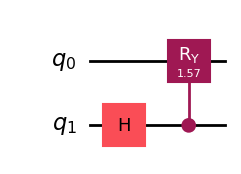

In [473]:
#SIMULACION
from qiskit.circuit.library import XGate, HGate, RXGate

qc_control = QuantumCircuit(2)

qc_control.h(1)             # poner el control en superposición
qc_control.cry(1.57, 1, 0)  # # CRY(theta) con theta=1.57 radianes, control en qubit 0 y objetivo qubit 1
qc_control.draw('mpl')

```
Statevector([0.70710678+0.j, 0.50019904+0.j, 0.        +0.j,
             0.49980088+0.j],
            dims=(2, 2))
```

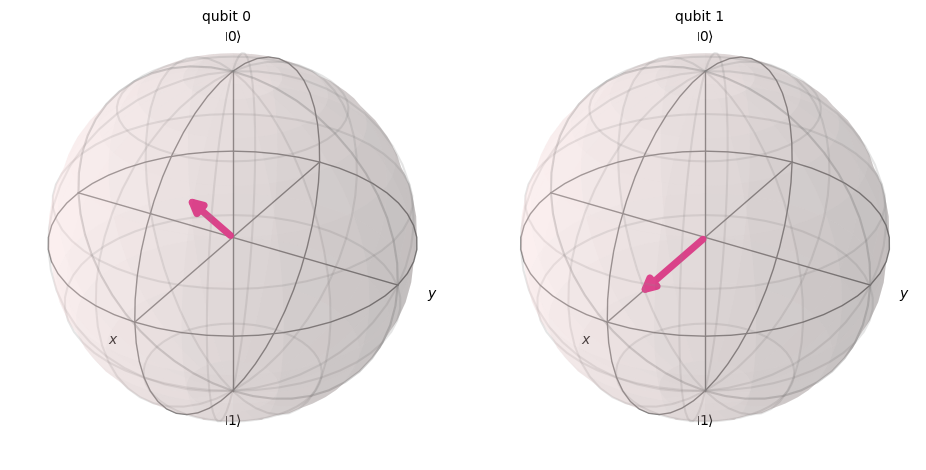

In [474]:
state_control = Statevector(qc_control)
display(Markdown(f"```\n{state}\n```"))

plot_bloch_multivector(state_control)

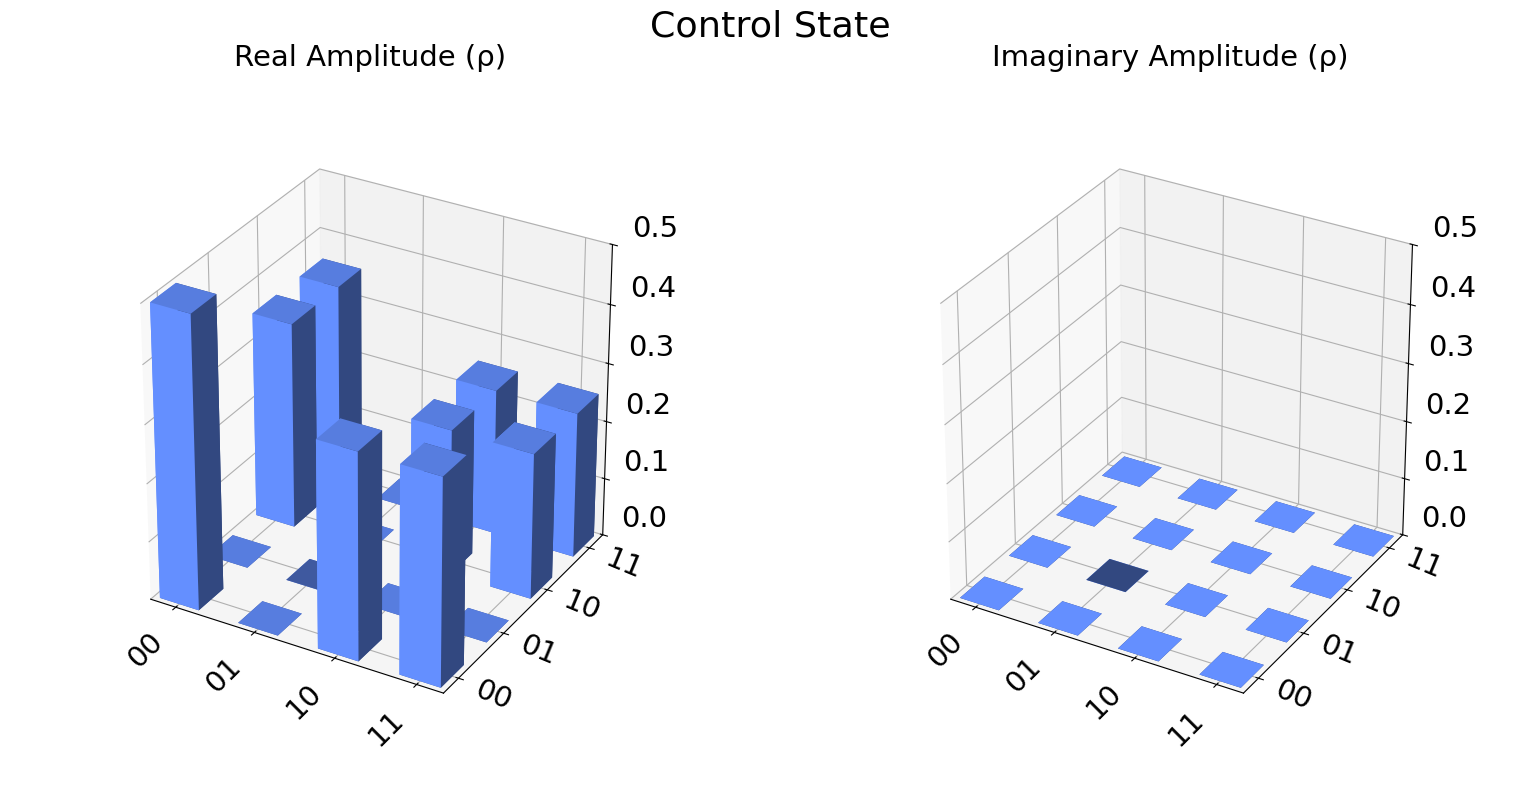

In [475]:
state_control.draw('city', title = 'Control State')

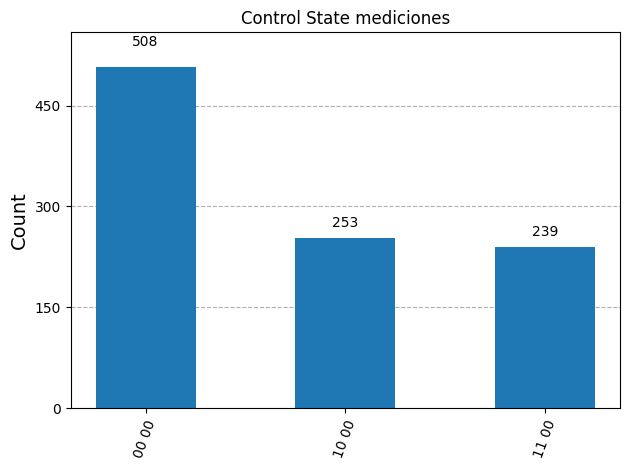

In [476]:
qc_control_meas = QuantumCircuit(2,2)
qc_control_meas.compose(qc_control, inplace = True)
qc_control_meas.measure_all()


result_control = simulator.run(qc_control_meas , shots = 1000).result()
counts_control  = result_control.get_counts()

plot_histogram(counts_control, title = 'Control State mediciones')


podemos extender el ejemplo a  $|10\rangle$ y aplicaremos las compuertas $h$ y $R_Y$.


El sistema comienza en:

$$
|\psi_0\rangle = |10\rangle =
\begin{bmatrix}
0 \\ 0 \\ 1 \\ 0
\end{bmatrix}
$$

Aplicamos $|\psi_1\rangle = H_0 |\psi_0\rangle$:

$$
|\psi_1\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix}\begin{bmatrix}
0 \\ 0 \\ 1 \\ 0
\end{bmatrix} =\frac{1}{\sqrt{2}} \begin{bmatrix}
1 \\ 0 \\ -1 \\ 0
\end{bmatrix}
= \frac{1}{\sqrt{2}}(|00\rangle - |10\rangle)
$$

Tenemos

$$
CRY(1.57) \approx
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0.7071 & -0.7071 \\
0 & 0 & 0.7071 & 0.7071
\end{bmatrix}
$$

Aplicamos CRY

$$
|\psi_2\rangle = CRY(1.57) \cdot |\psi_1\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0.7071 & -0.7071 \\
0 & 0 & 0.7071 & 0.7071
\end{bmatrix}
\begin{bmatrix}
1 \\ 0 \\ -1 \\ 0
\end{bmatrix}
=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\
0 \\
-0.7071 \\
-0.7071
\end{bmatrix}
$$

El estado final del sistema es:

$$
|\psi_{final}\rangle \approx
\frac{1}{\sqrt{2}} \left(
|00\rangle -0.7071|10\rangle - 0.7071|11\rangle
\right)
$$


```
Statevector([ 0.70710678+0.j,  0.        +0.j, -0.50019904+0.j,
             -0.49980088+0.j],
            dims=(2, 2))
```

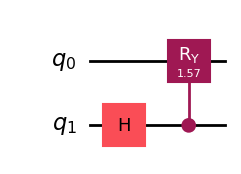

In [477]:
state_initial01 = Statevector.from_label('10')

qc_control01 = QuantumCircuit(2)

qc_control01.h(1)             # poner el control en superposición
qc_control01.cry(1.57, 1, 0)  # CRY(theta) con theta=1.57 radianes

state_final01 = state_initial01.evolve(qc_control01)
display(Markdown(f"```\n{state_final01}\n```"))
qc_control01.draw('mpl')           #circuito cuantico

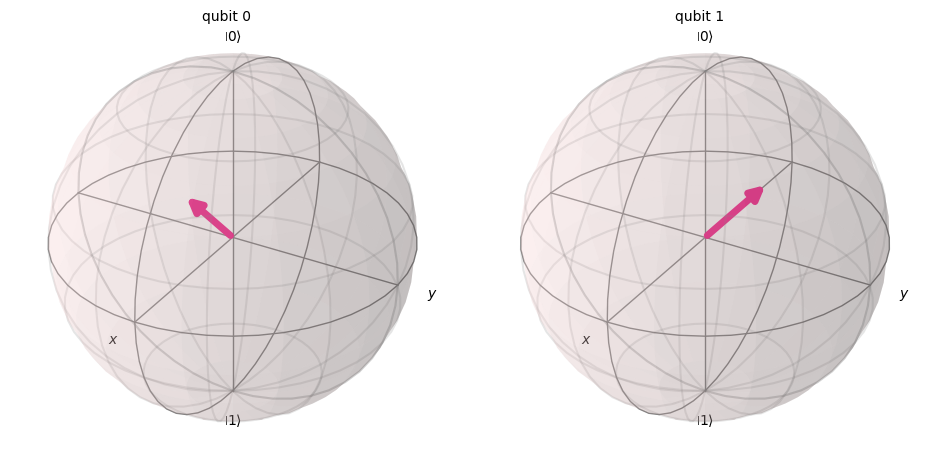

In [478]:
plot_bloch_multivector(state_final01)

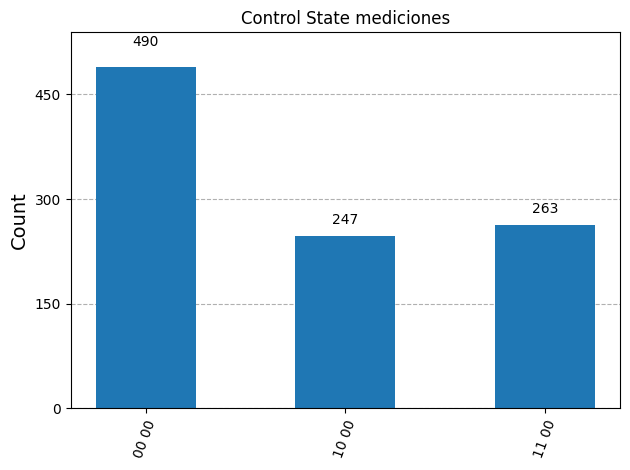

In [479]:
qc_control_meas01 = QuantumCircuit(2,2)
qc_control_meas01.compose(qc_control01, inplace = True)
qc_control_meas01.measure_all()


result_control01 = simulator.run(qc_control_meas01 , shots = 1000).result()
counts_control01  = result_control01.get_counts()

plot_histogram(counts_control01, title = 'Control State mediciones')

#Creación de Entrelazamiento entre dos Qubits

Cuando dos qubits están inicialmente en un estado separable (es decir, no entrelazados), para crear entrelazamiento es necesario aplicar puertas de dos qubits. Un circuito estándar para entralazar dos qubits es, Aplicar la puerta Hadamard $H$ al primer qubit luego aplicar una puerta CNOT, donde el primer qubit controla al segundo.

Para las entradas base $|xy\rangle$ con $x,y \in \{0,1\}$, la salida del circuito es:

$$
C_{01}(H \otimes I) |00\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) = |\Phi^{+}\rangle,
$$

$$
C_{01}(H \otimes I) |01\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle) = |\Psi^{+}\rangle,
$$

$$
C_{01}(H \otimes I) |10\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle) = |\Phi^{-}\rangle,
$$

$$
C_{01}(H \otimes I) |11\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle) = |\Psi^{-}\rangle.
$$



De forma más compacta, la salida puede escribirse como:

$$
C_{01}(H \otimes I) |xy\rangle = \frac{1}{\sqrt{2}} \big( |0 y\rangle + (-1)^x |1 \bar{y}\rangle \big),
$$

donde $\bar{y} = y \oplus 1$ es el XOR de $y$ con 1 (el bit complementario de $y$.


También se puede crear entrelazamiento utilizando la puerta Controlled-Z (CZ). El estado resultante al aplicar el circuito con CZ es:

$$
|\psi\rangle = \frac{1}{2} (|00\rangle + |01\rangle + |10\rangle - |11\rangle) = \frac{1}{\sqrt{2}} \big( |0\rangle|+\rangle + |1\rangle|-\rangle \big) = \frac{1}{\sqrt{2}} \big( |+\rangle|0\rangle + |-\rangle|1\rangle \big),
$$

que es un estado entrelazado que puede convertirse en un estado de Bell $|\Phi^{+}\rangle$ mediante operaciones adicionales.



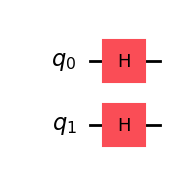

In [480]:
#EJEMPLO:
#crearemos el estado CZ en el Qubit 00
qc_cz = QuantumCircuit(2)
qc_cz.h(1)
qc_cz.h(0)
qc_cz.draw('mpl')              #circuito

```
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))
```

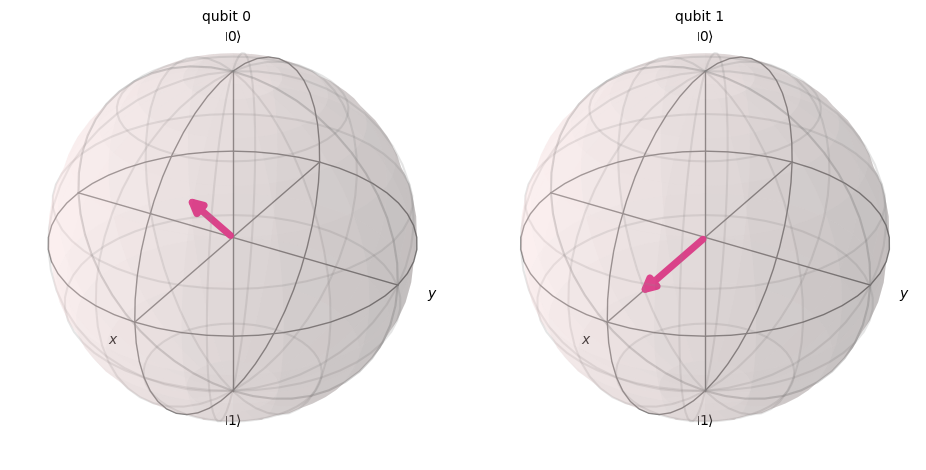

In [481]:
state_controlcz = Statevector(qc_cz)
display(Markdown(f"```\n{state_controlcz}\n```"))

plot_bloch_multivector(state_control)

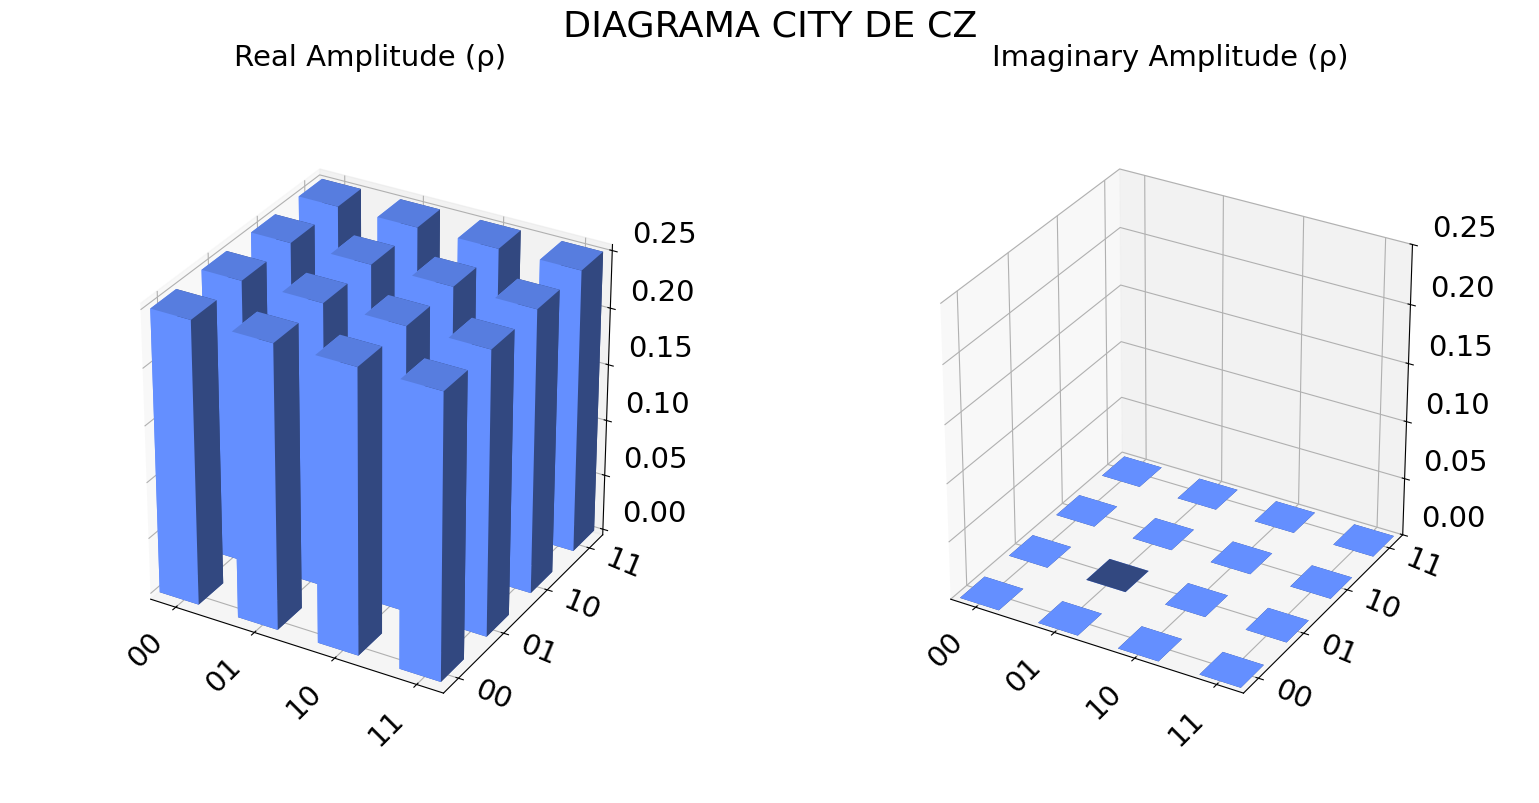

In [482]:
state_controlcz.draw('city', title = 'DIAGRAMA CITY DE CZ')

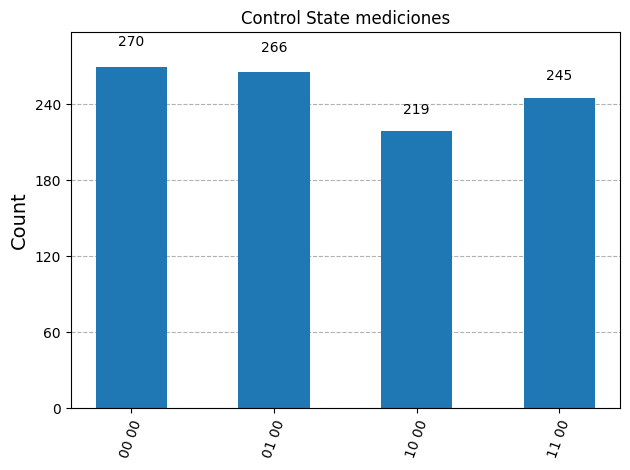

In [483]:
qc_control_meascz = QuantumCircuit(2,2)
qc_control_meascz.compose(qc_cz, inplace = True)
qc_control_meascz.measure_all()


result_controlcz = simulator.run(qc_control_meascz , shots = 1000).result()
counts_controlcz  = result_controlcz.get_counts()



plot_histogram(counts_controlcz, title = 'Control State mediciones')

{np.str_('00'): np.float64(0.5), np.str_('11'): np.float64(0.5)}


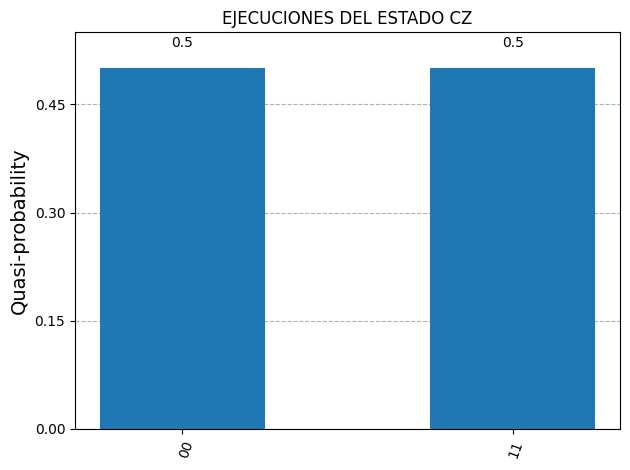

In [355]:
# utilizaremos el simulador Aer con fines pedagogicos (otra forma de obtener el histograma)
simulator = AerSimulator()               #inicializacion del simulador
job = simulator.run(qc, shots=1000)      #1000 repeticiones
result = job.result()                    #obtencion de resultados
counts = result.get_counts()             #conteo de resultados
print(counts)                            #mostramos resultados
plot_histogram(counts, title= 'EJECUCIONES DEL ESTADO CZ')                   #grafico de resultados



#SUPERDENSE CODING

Ya hemos visto como el entrlazamiento es una propiedad unica e intrinseca de los sistamas cuanticos estudiados, ahora una de sus varias aplicaciones s de "papel" se encuentra el superdense coding,el cual es un protocolo que permite enviar dos  Cbits de información utilizando únicamente un qubit. aprovechando que tanto el emisor como el locutor comparten un par de **qubits entrelazados** lo cual en teoria duplica la capacidad clásica del canal de comunicación cuántico, algo imposible con información clásica o sin entrelazamiento.

Un breve contexto:

> En un canal cuántico sin ruido, si Alice desea enviar un qubit a Bob, se demuestra que como máximo puede transmitir un solo bit clásico. Esto se debe a que una medición en un qubit sólo puede distinguir entre dos estados ortogonales, y no más. Incluso si Alice y Bob comparten bits aleatorios comunes, esta limitación persiste, ya que la aleatoriedad clásica no incrementa la capacidad de comunicación.  Sin embargo, la situación cambia radicalmente cuando Alice y Bob comparten un par de qubits entrelazados.



---

Supongamos que Alice y Bob comparten un par de qubits entrelazados en el estado Bell:

   $$
   |\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
   $$

Alice tiene en su defecto tiene el primer qubit mientras que  Bob tiene el segundo qubit (este estado es fijo antes de saber qué se quiere comunicar, asegurando que no contiene información clásica previa).

Supongamos que Alice quiere enviar los bits $x_0, x_1$ (un mensaje), donde cada uno es 0 o 1. Entonces,  Alice debe aplicar una puerta cuántica a su qubit (usando solo operaciones locales) y ka codificacion es la siguiente para cada mensaje:

Mensaje (x₀, x₁) | Operación que aplica
---------------- | --------------------
00               | Identidad (I)        
01               | X (NOT)              
10               | Z                    
11               | ZX                   

Esta operación transforma el estado Bell inicial en uno de los cuatro estados Bell mutuamente ortogonales. Eso es importante puesto que  los estados ortogonales se pueden distinguir perfectamente al medir.

Ahora, supongamos que Alice envio el mensaje y Bob tiene ambos qubits en su poder (el que ya tenía y el que le mandó Alice) por lo que el sistema completo está en uno de los cuatro estados Bell posibles, por lo que Bob debe decodificar el mensaje, entonces aplica dos compuertas:

1. **CNOT** (el primer qubit controla el segundo).
2. **Hadamard** sobre el primer qubit.

Después de esto, el sistema termina en uno de los cuatro estados base clásicos: $|00\rangle, |01\rangle, |10\rangle, |11\rangle$, dependiendo del mensaje original de Alice.

Naturalmente Bob mide ambos qubits y btiene exactamente los bits que Alice quería enviar: $x_0, x_1$


**Diegrama**

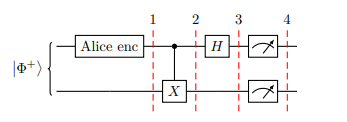

#Ejemplo

---


Supongamos que Alice quiere enviar el mensaje $01$:

* Según la tabla,Alice debe aplicar la compuerta X (NOT).

* Esto transforma el estado $|\Phi^+\rangle$ en:

  $$
  |\psi^1\rangle = (X \otimes I) (\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)) = \frac{1}{\sqrt{2}} (|10\rangle + |01\rangle)
  $$
  $$
  |\psi^2\rangle = C_{AB}| \psi^1 \rangle = \frac{1}{\sqrt{2}}(|11\rangle + |01\rangle)
  $$
  $$
  |\psi^3\rangle = (H \otimes I) |\psi^2 \rangle = \frac{1}{2} (|01\rangle -|11\rangle +  |01\rangle + |11\rangle) = |01\rangle
  $$

* Alice manda su qubit a Bob.

* Bob aplica CNOT y luego Hadamard, y finalmente obtiene el estado $|01\rangle$.

* Es decir, ¡recupera exactamente los bits $(0,1)$!




Estado de bell: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


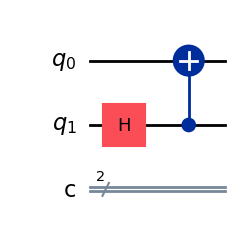

In [486]:
#simulacion del ejemplo

qc_sd = QuantumCircuit(2,2)      #circuito cuantico de comunicaciones

qc_sd.h(1)                       #estas compuertas son puramente para  recrear el estado de bell
qc_sd.cx(1,0)

estado = Statevector(qc_sd)     #comprobamos
print('Estado de bell:',estado)
qc_sd.draw('mpl')



In [487]:
def mensaje_alice(x0,x1):                      #esta funcuion implementa la tabla de mensajes de alice
    if x0 == 0 and x1 == 0:                    #si es el bit 00
        pass                                   #aplica I
    elif x0 == 0 and x1 == 1:                  #si es el bit  01
        qc_sd.x(1)                             # aplica X
        print('compuerta aplicada: X')
    elif x0 == 1 and x1 == 0:                  #si es el bit 10
        qc_sd.z(1)                             #aplica Z
        print('compuerta aplicada: Z')

    elif x0 == 1 and x1 == 1:                 #si es el bit 11
        qc_sd.z(1)                            #aplica Z
        qc_sd.x(1)                            #aplica X
        print('compuertas aplicadas: ZX')

    estado = Statevector(qc_sd)                #control de calculos
    print('psi1',estado)


def decodificacion():                         #decodificacion de Bob
    qc_sd.cx(1, 0)                            #aplica cnot
    estado = Statevector(qc_sd)               #control de calculos
    print('psi2',estado)

    qc_sd.h(1)                                #aplica H
    estado = Statevector(qc_sd)               #control de calculos
    print('psi3',estado)


In [488]:
x0,x1 = 0,1                               #Alice envia el mensaje 01
mensaje_alice(x0,x1)                      #codificacion de Alice

X
psi1 Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


In [489]:
decodificacion()                         #decodificacion de Bob

psi2 Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
psi3 Statevector([ 0.00000000e+00+0.j,  1.00000000e+00+0.j,  0.00000000e+00+0.j,
             -2.23711432e-17+0.j],
            dims=(2, 2))


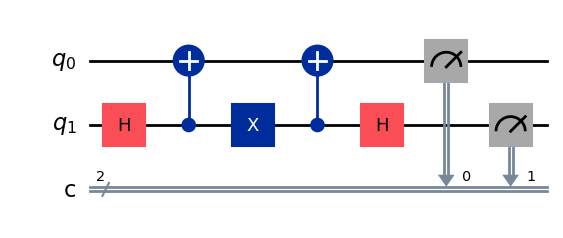

In [490]:
qc_sd.measure(0, 0)
qc_sd.measure(1, 1)
qc_sd.draw('mpl')

**Resultados**

```
{'01': 10000}
```

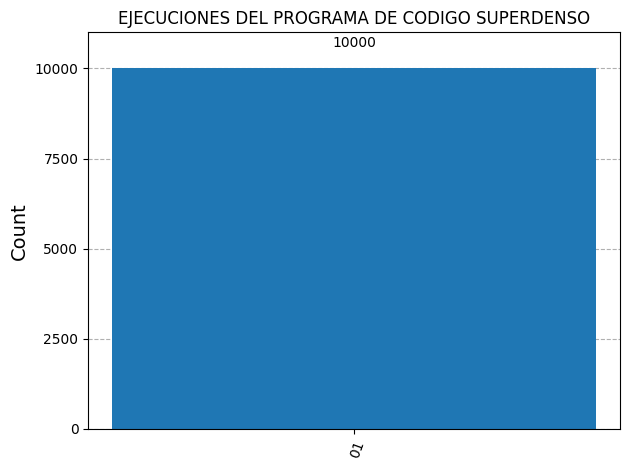

In [495]:
#simulacion

# utilizaremos el simulador Aer con fines pedagogicos (otra forma de obtener el histograma)
simulator_sd = AerSimulator()               #inicializacion del simulador
job_sd = simulator.run(qc_sd, shots=10000)      #1000 repeticiones
result_sd = job_sd.result()                    #obtencion de resultados
counts_sd = result_sd.get_counts()             #conteo de resultados
display(Markdown('**Resultados**'))
display(Markdown((f"```\n{counts_sd}\n```")))                            #mostramos resultados
plot_histogram(counts_sd, title= 'EJECUCIONES DEL PROGRAMA DE CODIGO SUPERDENSO')                   #grafico de resultados

vemos que Alice manda 1 qubit pero transmite 2 cbits  gracias al entrelazamiento y Bob recupera el mensaje de Alice eficientemente. Eso no es posible sin recursos cuánticos.